<h1 align="center"> IBM Data Analytics with Excel and R Professional Certificate</h1>
<h2 align="center"> Data Science with R - Capstone Project</h2>

![My Image](cap_img.png)

<h3>Ikemefula Oriaku <sup>Data Scientist [SQL | Python | R]</sup></h3>
<div>
<a href="https://github.com/gentleiyke" target="_blank">
    <img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" alt="GitHub" style="width:30px;height:30px;margin-right:10px;">
</a>

<a href="https://medium.com/@gentleiyke" target="_blank">
    <img src="https://cdn.icon-icons.com/icons2/2997/PNG/512/medium_logo_icon_187624.png" alt="Medium" style="width:30px;height:30px;">
</a>

<a href="https://www.kaggle.com/gentleiyke" target="_blank">
    <img src="https://www.vectorlogo.zone/logos/kaggle/kaggle-icon.svg" alt="Kaggle" style="width:30px;height:30px;">
</a>

<a href="https://www.linkedin.com/in/gentleiyke" target="_blank">
    <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" alt="LinkedIn" style="width:30px;height:30px;">
</a>
</div>

## Install and Load Packages

In [4]:
# Import necessary packages for the data collection web scraping task
require("rvest")
require('tidyverse')
require('httr')
require('ggplot2')
require('repr')
require('rlang')
require('tidymodels')
require('stringr')
require('glmnet')
require('caret')
require('randomForest')

# rvest for web scraping task
library(rvest)

# httr library for rest api
library(httr)

# tidyverse for useful data collection functions in r
library(tidyverse)

# ggplot2 and repr for data visualisation
library(ggplot2)
library(repr)

# Define the size of plots
options(repr.plot.width = 18, repr.plot.height = 12)

# rlang for working with R objects
library(rlang)

# tidymodels for modelling and machine learning
librarytidymodels)

# stringr for working with strings
library(stringr)

# glmnet engine for fitting generalised linear models and implementing of regularised regression techniques (L1 and L2)
library(glmnet)

# caret for building predictive models
library(caret)

# randomForest for classification and regression tasks
library(randomForest)

## Data Collection using Web scrapping and API

#### Extract bike sharing systems HTML table from a Wiki page

In [11]:
# Define url path
URL <- "https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems"

# Fetching and parsing the HTML content
htmlContent <- read_html(URL)

# Extract all table nodes from the parsed HTML content
tableNodes <- html_nodes(htmlContent, 'table') 

# Iterate over each table node in the extracted table nodes
for (tableNode in tableNodes) {
  print(tableNodes)
}

# Extract and store the first table node from the list of table nodes
bikeSharing <- tableNodes[[1]]

{xml_nodeset (4)}
[1] <table class="wikitable sortable sticky-header" style="background:#f8f9fa ...
[2] <table class="nowraplinks mw-collapsible autocollapse navbox-inner" style ...
[3] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbod ...
[4] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbod ...
{xml_nodeset (4)}
[1] <table class="wikitable sortable sticky-header" style="background:#f8f9fa ...
[2] <table class="nowraplinks mw-collapsible autocollapse navbox-inner" style ...
[3] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbod ...
[4] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbod ...
{xml_nodeset (4)}
[1] <table class="wikitable sortable sticky-header" style="background:#f8f9fa ...
[2] <table class="nowraplinks mw-collapsible autocollapse navbox-inner" style ...
[3] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbod ...
[4] <table class="nowraplinks navbox-subgrou

####  Convert extracted table node into a Data Frame

In [12]:
# Convert the stored table node into a dataframe
htmltableDF <- html_table(bikeSharing, fill = TRUE)

In [14]:
# Check and remove duplicate columns
htmltableDF <- htmltableDF[, !duplicated(colnames(htmltableDF))]

#### Summarise the Data Frame

In [15]:
# Summarise the dataframe
summary(htmltableDF)

   Country          City / Region          Name              System         
 Length:840         Length:840         Length:840         Length:840        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Operator           Launched         Discontinued      
 Length:840         Length:840         Length:840        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

#### Display Data Frame

In [16]:
# Display the first few rows of the dataframe
head(htmltableDF)

Country   City / Region         Name                 System           
1 Albania   Tirana[5]             Ecovolis                              
2 Argentina Buenos Aires[6][7]    Ecobici              Serttel Brasil[8]
3 Argentina Mendoza[10]           Metrobici                             
4 Argentina Rosario               Mi Bici Tu Bici[11]                   
5 Argentina San Lorenzo, Santa Fe Biciudad             Biciudad         
6 Australia Melbourne[12]         Melbourne Bike Share PBSC & 8D        
  Operator                     Launched         Discontinued        
1                              March 2011       Discontinued        
2 Bike In Baires Consortium[9] 2010                                 
3                              2014                                 
4                              2 December 2015                      
5                              27 November 2016                     
6 Motivate                     June 2010        30 November 2019[13]

In [17]:
names(htmltableDF)

[1] "Country"       "City / Region" "Name"          "System"       
[5] "Operator"      "Launched"      "Discontinued"

In [18]:
# Rename city/region column name
names(htmltableDF)[names(htmltableDF) == "City / Region"] <- "City"
head(htmltableDF)

Country   City                  Name                 System           
1 Albania   Tirana[5]             Ecovolis                              
2 Argentina Buenos Aires[6][7]    Ecobici              Serttel Brasil[8]
3 Argentina Mendoza[10]           Metrobici                             
4 Argentina Rosario               Mi Bici Tu Bici[11]                   
5 Argentina San Lorenzo, Santa Fe Biciudad             Biciudad         
6 Australia Melbourne[12]         Melbourne Bike Share PBSC & 8D        
  Operator                     Launched         Discontinued        
1                              March 2011       Discontinued        
2 Bike In Baires Consortium[9] 2010                                 
3                              2014                                 
4                              2 December 2015                      
5                              27 November 2016                     
6 Motivate                     June 2010        30 November 2019[13]

### Data Collection using API

In [19]:
# Define a function to extract city data using web api
getWeatherForecastByCities <- function(city_names) {
  # create empty vectors to hold data
  city <- c() # empty city column
  weather <- c() # empty weather
  visibility <- c()
  temp <- c() # current temp
  temp_min <- c() # min temp
  temp_max <- c() # max temp
  pressure <- c() # pressure
  humidity <- c() # humidity
  wind_speed <- c() # wind speed
  wind_deg <- c() # wind direction
  forecast_datatime <- c() # forecast timestamp
  season <- c() # season
  weather_labels <- c() # label to be shown on Leaflet
  weather_detail_labels <- c() # detailed label to be shown on Leaflet
  hours <- c() # hour
  
 # loop cities - 5 days forecast
  for (city_name in city_names) {
    forecastURL <- 'https://api.openweathermap.org/data/2.5/forecast'
    forecastQuery <- list(q = city_name, appid = '718c11d667198eb09d9803c3096db8d8', units='metric')
    forecastResponse <- GET(forecastURL, query=forecastQuery)
    jsonList <- content(forecastResponse, as='parsed')
    results <- jsonList$list
    # loop result
    for (result in results) {
      # get weather data by city
      city <- c(city, city_name)
      weather <- c(weather, result$weather[[1]]$main) # get weather status
      visibility <- c(visibility, result$visibility) # get visibility
      temp <- c(temp, result$main$temp) # get temp
      temp_min <- c(temp_min, result$main$temp_min) # get min temp
      temp_max <- c(temp_max, result$main$temp_max) # get max temp
      pressure <- c(pressure, result$main$pressure) # get pressure
      humidity <- c(humidity, result$main$humidity) # get humidity
      wind_speed <- c(wind_speed, result$wind$speed) # get wind speed
      wind_deg <- c(wind_deg, result$wind$deg) # get wind direction
      forecate_date <- result$dt_txt # get timestamp
      forecast_datatime <- c(forecast_datatime, forecate_date) # assign timestamp
     }
  }
    
 # create a data frame to hold the results
 cities_weather_df <- data.frame(CITY_ASCII=city, WEATHER=weather, VISIBILITY=visibility, TEMPERATURE=temp, TEMP_MIN=temp_min, 
                  TEMP_MAX=temp_max, PRESSURE=pressure,HUMIDITY=humidity, WIND_SPEED=wind_speed, WIND_DEG=wind_deg, 
                  FORECASTDATETIME=forecast_datatime)
  return(cities_weather_df)
}

#### Weather from Selected Cities

In [20]:
# define a vector containing city names
cities <- c("Seoul", "Washington, D.C.", "Paris", "Suzhou")

# assign a variable to hold the dataframe extracted by the pipeline
cities_weather_df <- getWeatherForecastByCities(cities)

# print 5 days generated data frame for Seoul
head(cities_weather_df, 40)

CITY_ASCII WEATHER VISIBILITY TEMPERATURE TEMP_MIN TEMP_MAX PRESSURE
1  Seoul      Clouds  10000      26.88       26.26    26.88    1007    
2  Seoul      Clouds  10000      25.92       25.28    25.92    1008    
3  Seoul      Clouds  10000      24.62       24.62    24.62    1008    
4  Seoul      Rain    10000      24.08       24.08    24.08    1009    
5  Seoul      Rain    10000      23.50       23.50    23.50    1010    
6  Seoul      Clouds  10000      22.87       22.87    22.87    1010    
7  Seoul      Rain    10000      22.09       22.09    22.09    1010    
8  Seoul      Rain    10000      22.13       22.13    22.13    1010    
9  Seoul      Clouds  10000      22.43       22.43    22.43    1012    
10 Seoul      Clouds  10000      22.61       22.61    22.61    1011    
11 Seoul      Clouds  10000      22.88       22.88    22.88    1011    
12 Seoul      Clouds  10000      22.37       22.37    22.37    1012    
13 Seoul      Clouds  10000      24.08       24.08    24.08    1013    
14 Seoul      Clouds  10000      29.64       29.64    29.64    1012    
15 Seoul      Clouds  10000      29.99       29.99    29.99    1010    
16 Seoul      Clouds  10000      29.15       29.15    29.15    1010    
17 Seoul      Clouds  10000      26.31       26.31    26.31    1010    
18 Seoul      Clouds  10000      25.33       25.33    25.33    1010    
19 Seoul      Clouds  10000      23.76       23.76    23.76    1010    
20 Seoul      Clouds  10000      22.31       22.31    22.31    1010    
21 Seoul      Clear   10000      25.28       25.28    25.28    1011    
22 Seoul      Clouds  10000      29.95       29.95    29.95    1009    
23 Seoul      Clouds  10000      30.95       30.95    30.95    1007    
24 Seoul      Clouds  10000      29.02       29.02    29.02    1006    
25 Seoul      Clouds  10000      26.53       26.53    26.53    1008    
26 Seoul      Clouds  10000      25.45       25.45    25.45    1008    
27 Seoul      Rain    10000      24.52       24.52    24.52    1006    
28 Seoul      Clouds  10000      24.08       24.08    24.08    1007    
29 Seoul      Rain    10000      24.96       24.96    24.96    1007    
30 Seoul      Rain    10000      25.21       25.21    25.21    1006    
31 Seoul      Rain    10000      26.24       26.24    26.24    1005    
32 Seoul      Clouds  10000      25.85       25.85    25.85    1005    
33 Seoul      Clouds  10000      24.35       24.35    24.35    1006    
34 Seoul      Clouds  10000      23.72       23.72    23.72    1007    
35 Seoul      Clouds  10000      22.82       22.82    22.82    1007    
36 Seoul      Clouds  10000      21.98       21.98    21.98    1008    
37 Seoul      Clouds  10000      25.38       25.38    25.38    1009    
38 Seoul      Clouds  10000      30.42       30.42    30.42    1009    
39 Seoul      Clouds  10000      32.61       32.61    32.61    1007    
40 Seoul      Clear   10000      29.09       29.09    29.09    1008    
   HUMIDITY WIND_SPEED WIND_DEG FORECASTDATETIME   
1  60       1.78       271      2024-09-01 12:00:00
2  60       0.72       245      2024-09-01 15:00:00
3  64       1.02       183      2024-09-01 18:00:00
4  69       0.51       107      2024-09-01 21:00:00
5  70       1.88        68      2024-09-02 00:00:00
6  69       2.76        50      2024-09-02 03:00:00
7  73       2.46        69      2024-09-02 06:00:00
8  75       2.22        68      2024-09-02 09:00:00
9  78       1.82        66      2024-09-02 12:00:00
10 78       2.21        75      2024-09-02 15:00:00
11 74       2.45        67      2024-09-02 18:00:00
12 71       2.45        68      2024-09-02 21:00:00
13 62       2.88        73      2024-09-03 00:00:00
14 45       3.02        91      2024-09-03 03:00:00
15 45       2.15       103      2024-09-03 06:00:00
16 47       1.84        91      2024-09-03 09:00:00
17 58       1.04       118      2024-09-03 12:00:00
18 61       1.29       101      2024-09-03 15:00:00
19 65       1.32        95      2024-09-03 18:00:00
20 70      

#### Export the Data Frame as a CSV file

In [51]:
# Define the file path for the CSV files
bike_sharing_csv <- 'raw_bike_sharing_systems.csv' 
worldcities_weather_csv <- 'cities_weather_forecast.csv'

# Define a function to write to CSV
writeCSV <- function(dataframe, filepath, row.names=FALSE) {
    write.csv(dataframe, file = filepath, row.names=FALSE)
}

# Write Dataframe to CSV using a function
write.csv(htmltableDF, bike_sharing_csv)
write.csv(cities_weather_df, worldcities_weather_csv)

### Data Wrangling with Regular Expressions and DPLYR

#### Load datasets and standardise column names

In [21]:
dataset_list <- c('raw_bike_sharing_systems.csv', 'raw_seoul_bike_sharing.csv', 'raw_cities_weather_forecast.csv', 'raw_worldcities.csv')
dataset_list

[1] "raw_bike_sharing_systems.csv"    "raw_seoul_bike_sharing.csv"     
[3] "raw_cities_weather_forecast.csv" "raw_worldcities.csv"

In [22]:
# define a function to standardise the columns (change columns to uppercase and replace spaces with underscore) 
standardise_dataset <- function(dataset) {
    names(dataset) <- names(dataset) %>% str_replace_all(" ", "_") %>% toupper(.)  
    return(dataset)
}

In [23]:
# loop through data frames and apply the standardisation function and print summary
for (dataset in dataset_list) {
    # read the dataset
    df <- read.csv(dataset)

    # apply the standardise function
    df_clean <- standardise_dataset(df)

    # print the result and summary of the data frame
    print(paste('New column names for', dataset, ':', toString(names(df_clean))))
    print(summary(df_clean))    
}

[1] "New column names for raw_bike_sharing_systems.csv : COUNTRY, CITY, NAME, SYSTEM, OPERATOR, LAUNCHED, DISCONTINUED, STATIONS, BICYCLES, DAILY_RIDERSHIP"
   COUNTRY              CITY               NAME              SYSTEM         
 Length:480         Length:480         Length:480         Length:480        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   OPERATOR           LAUNCHED         DISCONTINUED         STATIONS        
 Length:480         Length:480         Length:480         Length:480        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   BICYCLES         DAILY_RIDERSHIP   
 Length:480         Length:480        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
[1] "New column names for raw_seoul_bike_sharing.csv : DATE, RENTED_BIK

#### Data Preprocessing Web-scraped Bike-sharing System Dataset

In [24]:
# load wiki bike sharing system dataset
bike_sharing_system_df <- read.csv(dataset_list[1])
head(bike_sharing_system_df)

COUNTRY   CITY                  NAME                 SYSTEM        
1 Albania   Tirana                Ecovolis             NA            
2 Argentina Mendoza               Metrobici            NA            
3 Argentina San Lorenzo, Santa Fe Biciudad             Biciudad      
4 Argentina Buenos Aires          Ecobici              Serttel Brasil
5 Argentina Rosario               Mi Bici Tu Bici[11]  NA            
6 Australia Melbourne[12]         Melbourne Bike Share PBSC & 8D     
  OPERATOR                       LAUNCHED         DISCONTINUED         STATIONS
1 NA                             March 2011       NA                   8       
2 NA                             2014             NA                   2       
3 NA                             27 November 2016 NA                   8       
4 Bike In Baires Consortium.[10] 2010             NA                   400     
5 NA                             2 December 2015  NA                   47      
6 Motivate                       June 2010        30 November 2019[13] 53      
  BICYCLES DAILY_RIDERSHIP
1 200      NA             
2 40       NA             
3 80       NA             
4 4000     21917          
5 480      NA             
6 676      NA

In [25]:
# Select the four columns from the dataframe and save in a sub-data frame
sub_bike_sharing_system_df <- bike_sharing_system_df %>% select(COUNTRY, CITY, SYSTEM, BICYCLES)

In [26]:
# check the data type of the selected columns
sub_bike_sharing_system_df %>% 
    summarize_all(class) %>%
    gather(variable, class)

variable class    
1 COUNTRY  character
2 CITY     character
3 SYSTEM   character
4 BICYCLES character

In [27]:
# create grepl search function to find non-digital characters in the bicycle column
find_character <- function(strings) grepl("[^0-9]", strings)

In [28]:
# find non-numeric characters in the Bicycles column
sub_bike_sharing_system_df %>% 
    select(BICYCLES) %>% 
    filter(find_character(BICYCLES)) %>%
    slice(0:10) 

BICYCLES                  
1  4115[22]                  
2  310[59]                   
3  500[72]                   
4  [75]                      
5  180[76]                   
6  600[77]                   
7  [78]                      
8  initially 800 (later 2500)
9  100 (220)                 
10 370[114]

In [29]:
# Define a regular expression lookup pattern and create a grepl function to find any reference links
ref_pattern <- "\\[[A-z0-9]+\\]"
find_reference_pattern <- function(strings) grepl(ref_pattern, strings)

In [30]:
# Check whether the COUNTRY column has any reference links
sub_bike_sharing_system_df %>% 
    select(COUNTRY) %>% 
    filter(find_reference_pattern(COUNTRY))

COUNTRY

In [31]:
# Check whether the CITY column has any reference links
sub_bike_sharing_system_df %>% 
    select(CITY) %>% 
    filter(find_reference_pattern(CITY)) %>%
    slice(0:10)

CITY                 
1  Melbourne[12]        
2  Brisbane[14][15]     
3  Lower Austria[18]    
4  Namur[19]            
5  Brussels[21]         
6  Salvador[23]         
7  Belo Horizonte[24]   
8  João Pessoa[25]      
9  (Pedro de) Toledo[26]
10 Rio de Janeiro[27]

In [32]:
# Check for reference links in the System column (variable)
sub_bike_sharing_system_df %>% 
    select(SYSTEM) %>% 
    filter(find_reference_pattern(SYSTEM))

SYSTEM                           
1 EasyBike[58]                     
2 4 Gen.[61]                       
3 3 Gen. SmooveKey[113]            
4 3 Gen. Smoove[141][142][143][139]
5 3 Gen. Smoove[179]               
6 3 Gen. Smoove[181]               
7 3 Gen. Smoove[183]

#### Remove undesired reference links using regular expressions

In [33]:
# create a remove reference links function using replace_all
remove_reference <- function(strings) {
  reference_path <- ''
  reference_pattern <- '\\[.+\\]' 
  replace_text <- str_replace_all(strings, reference_pattern, reference_path)
  return(replace_text)
}

In [34]:
# apply the remove reference function to dataset columns using mutate
sub_bike_sharing_system_df <- sub_bike_sharing_system_df %>% mutate(CITY=remove_reference(CITY), 
                               SYSTEM=remove_reference(SYSTEM), 
                               COUNTRY=remove_reference(COUNTRY))

In [35]:
head(sub_bike_sharing_system_df)

COUNTRY   CITY                  SYSTEM         BICYCLES
1 Albania   Tirana                NA             200     
2 Argentina Mendoza               NA             40      
3 Argentina San Lorenzo, Santa Fe Biciudad       80      
4 Argentina Buenos Aires          Serttel Brasil 4000    
5 Argentina Rosario               NA             480     
6 Australia Melbourne             PBSC & 8D      676

In [36]:
# cross reference to ensure reference links were removed
sub_bike_sharing_system_df %>% 
    select(CITY, SYSTEM, COUNTRY) %>% 
    filter(find_reference_pattern(CITY) | 
           find_reference_pattern(SYSTEM) | 
           find_reference_pattern(COUNTRY)
          )

CITY SYSTEM COUNTRY

#### Extract the numeric value using regular expressions

In [37]:
# write a function to xtract the first numbers from bicycle column using strinr extract
extract_numeric <- function(columns) {
  digital_pattern <- '^\\d+' # set pattern
  extracted <- str_extract(columns, digital_pattern)
  extracted <- as.numeric(extracted)
  return(extracted)
}

In [38]:
# Use the mutate() function on the BICYCLES column
sub_bike_sharing_system_df <- sub_bike_sharing_system_df %>% mutate(BICYCLES=extract_numeric(BICYCLES))

In [39]:
# print summary of numeric column
summary(sub_bike_sharing_system_df$BICYCLES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      5     100     350    2025    1400   78000      79 

#### Data Preprocessing the Seoul Bike-sharing System Dataset

In [40]:
seoul_bike_sharing_df <- read.csv(dataset_list[2])
head(seoul_bike_sharing_df)

DATE       RENTED_BIKE_COUNT HOUR TEMPERATURE HUMIDITY WIND_SPEED VISIBILITY
1 01/12/2017 254               0    -5.2        37       2.2        2000      
2 01/12/2017 204               1    -5.5        38       0.8        2000      
3 01/12/2017 173               2    -6.0        39       1.0        2000      
4 01/12/2017 107               3    -6.2        40       0.9        2000      
5 01/12/2017  78               4    -6.0        36       2.3        2000      
6 01/12/2017 100               5    -6.4        37       1.5        2000      
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL SEASONS HOLIDAY   
1 -17.6                 0               0        0        Winter  No Holiday
2 -17.6                 0               0        0        Winter  No Holiday
3 -17.7                 0               0        0        Winter  No Holiday
4 -17.6                 0               0        0        Winter  No Holiday
5 -18.6                 0               0        0        Winter  No Holiday
6 -18.7                 0               0        0        Winter  No Holiday
  FUNCTIONING_DAY
1 Yes            
2 Yes            
3 Yes            
4 Yes            
5 Yes            
6 Yes

In [41]:
summary(seoul_bike_sharing_df)
print('Dimension of Data Frame')
dim(seoul_bike_sharing_df)

     DATE           RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Length:8760        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Mode  :character   Median : 542.0    Median :11.50   Median : 13.70  
                    Mean   : 729.2    Mean   :11.50   Mean   : 12.87  
                    3rd Qu.:1084.0    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                    NA's   :295                       NA's   :11      
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.

[1] "Dimension of Data Frame"


[1] 8760   14

#### Detect and handle missing values

In [42]:
# drop missing NAs in the rented bike column
seoul_bike_sharing_df <- seoul_bike_sharing_df %>% drop_na(RENTED_BIKE_COUNT)

In [43]:
# use imputation to handle missing NAs in temperature variable 
seoul_bike_sharing_df %>% filter(is.na(TEMPERATURE))

DATE       RENTED_BIKE_COUNT HOUR TEMPERATURE HUMIDITY WIND_SPEED VISIBILITY
1  07/06/2018 3221              18   NA          57       2.7        1217      
2  12/06/2018 1246              14   NA          45       2.2        1961      
3  13/06/2018 2664              17   NA          57       3.3         919      
4  17/06/2018 2330              17   NA          58       3.3         865      
5  20/06/2018 2741              19   NA          61       2.7        1236      
6  30/06/2018 1144              13   NA          87       1.7         390      
7  05/07/2018  827              10   NA          75       1.1        1028      
8  11/07/2018  634               9   NA          96       0.6         450      
9  12/07/2018  593               6   NA          93       1.1         852      
10 21/07/2018  347               4   NA          77       1.2        1203      
11 21/08/2018 1277              23   NA          75       0.1        1892      
   DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL SEASONS HOLIDAY   
1  16.4                  0.96            0.0      0        Summer  No Holiday
2  12.7                  1.39            0.0      0        Summer  No Holiday
3  16.4                  0.87            0.0      0        Summer  No Holiday
4  16.7                  0.66            0.0      0        Summer  No Holiday
5  17.5                  0.60            0.0      0        Summer  No Holiday
6  23.2                  0.71            3.5      0        Summer  No Holiday
7  20.8                  1.22            0.0      0        Summer  No Holiday
8  24.9                  0.41            0.0      0        Summer  No Holiday
9  24.3                  0.01            0.0      0        Summer  No Holiday
10 21.2                  0.00            0.0      0        Summer  No Holiday
11 20.8                  0.00            0.0      0        Summer  No Holiday
   FUNCTIONING_DAY
1  Yes            
2  Yes            
3  Yes            
4  Yes            
5  Yes            
6  Yes            
7  Yes            
8  Yes            
9  Yes            
10 Yes            
11 Yes

In [44]:
# Calculate the average summer temperature
summer_temperature_avg <- seoul_bike_sharing_df %>% 
  filter(SEASONS == "Summer", !is.na(TEMPERATURE)) %>%
  summarise(average = round(mean(TEMPERATURE), 2))

In [45]:
summer_temperature_avg

average
1 26.59

In [46]:
# extract the average from the tibble into a variable
average_temperature <- summer_temperature_avg$average
average_temperature

[1] 26.59

In [47]:
# Use imputation to handle the missing TEMPERATURE values by replacing NAs with summer average temperature
seoul_bike_sharing_df <- seoul_bike_sharing_df %>% 
  mutate(TEMPERATURE = replace_na(TEMPERATURE, average_temperature))

In [48]:
# Print the summary of the dataset again to make sure no missing values in all columns
summary(seoul_bike_sharing_df)
dim(seoul_bike_sharing_df)

     DATE           RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Length:8465        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Mode  :character   Median : 542.0    Median :12.00   Median : 13.50  
                    Mean   : 729.2    Mean   :11.51   Mean   : 12.77  
                    3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.70  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 SOLAR_RADIAT

[1] 8465   14

#### Feature Engineering using indicator (dummy) variables and Min-max Scaler

In [49]:
# Convert the HOUR column into character
seoul_bike_sharing_converted_df <- seoul_bike_sharing_df %>% mutate(HOUR = as.character(HOUR))
summary(seoul_bike_sharing_converted_df)
dim(seoul_bike_sharing_converted_df)

     DATE           RENTED_BIKE_COUNT     HOUR            TEMPERATURE    
 Length:8465        Min.   :   2.0    Length:8465        Min.   :-17.80  
 Class :character   1st Qu.: 214.0    Class :character   1st Qu.:  3.00  
 Mode  :character   Median : 542.0    Mode  :character   Median : 13.50  
                    Mean   : 729.2                       Mean   : 12.77  
                    3rd Qu.:1084.0                       3rd Qu.: 22.70  
                    Max.   :3556.0                       Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.20

[1] 8465   14

In [50]:
# Convert SEASONS, HOLIDAY, FUNCTIONING_DAY, and HOUR columns into indicator columns.
seoul_bike_sharing_converted_df <- seoul_bike_sharing_converted_df %>%
  mutate(dummy = 1) %>%
  spread(key = HOLIDAY, value = dummy, fill = 0) %>%
  mutate(dummy = 1) %>%
  spread(key = SEASONS, value = dummy, fill = 0) %>%
  mutate(dummy = 1) %>%
  spread(key = HOUR, value = dummy, fill = 0) %>%
  mutate(dummy = 1) %>%
  spread(key = FUNCTIONING_DAY, value = dummy, fill = 0)

In [51]:
summary(seoul_bike_sharing_converted_df)
print('Data frame Dimension')
dim(seoul_bike_sharing_converted_df)

     DATE           RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY    
 Length:8465        Min.   :   2.0    Min.   :-17.80   Min.   : 0.00  
 Class :character   1st Qu.: 214.0    1st Qu.:  3.00   1st Qu.:42.00  
 Mode  :character   Median : 542.0    Median : 13.50   Median :57.00  
                    Mean   : 729.2    Mean   : 12.77   Mean   :58.15  
                    3rd Qu.:1084.0    3rd Qu.: 22.70   3rd Qu.:74.00  
                    Max.   :3556.0    Max.   : 39.40   Max.   :98.00  
   WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE SOLAR_RADIATION 
 Min.   :0.000   Min.   :  27   Min.   :-30.600       Min.   :0.0000  
 1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100       1st Qu.:0.0000  
 Median :1.500   Median :1690   Median :  4.700       Median :0.0100  
 Mean   :1.726   Mean   :1434   Mean   :  3.945       Mean   :0.5679  
 3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200       3rd Qu.:0.9300  
 Max.   :7.400   Max.   :2000   Max.   : 27.200       Max.   :3.5200  
    RA

[1] "Data frame Dimension"


[1] 8465   41

In [52]:
head(seoul_bike_sharing_converted_df)

DATE       RENTED_BIKE_COUNT TEMPERATURE HUMIDITY WIND_SPEED VISIBILITY
1 01/12/2017 254               -5.2        37       2.2        2000      
2 01/12/2017 204               -5.5        38       0.8        2000      
3 01/12/2017 173               -6.0        39       1.0        2000      
4 01/12/2017 107               -6.2        40       0.9        2000      
5 01/12/2017  78               -6.0        36       2.3        2000      
6 01/12/2017 100               -6.4        37       1.5        2000      
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL ⋯ 22 23 3 4 5 6 7 8 9
1 -17.6                 0               0        0        ⋯ 0  0  0 0 0 0 0 0 0
2 -17.6                 0               0        0        ⋯ 0  0  0 0 0 0 0 0 0
3 -17.7                 0               0        0        ⋯ 0  0  0 0 0 0 0 0 0
4 -17.6                 0               0        0        ⋯ 0  0  1 0 0 0 0 0 0
5 -18.6                 0               0        0        ⋯ 0  0  0 1 0 0 0 0 0
6 -18.7                 0               0        0        ⋯ 0  0  0 0 1 0 0 0 0
  Yes
1 1  
2 1  
3 1  
4 1  
5 1  
6 1

#### Normalise using the min-max scaler

In [53]:
# Create a min-max scaler normalisation function
minmax_scaler <- function(columns) {
  (columns - min(columns)) / (max(columns) - min(columns))
} 

In [54]:
# Use the mutate function to apply the min-max scaler to the variables 
# (rented bike count, temp, humidity, wind speed, visibility, dew_point temp, solar rad, rainfall and snowfall)
seoul_bike_sharing_normalised_df <- seoul_bike_sharing_converted_df %>%
  mutate(
    RENTED_BIKE_COUNT = minmax_scaler(RENTED_BIKE_COUNT), 
    TEMPERATURE = minmax_scaler(TEMPERATURE), 
    HUMIDITY = minmax_scaler(HUMIDITY),
    WIND_SPEED = minmax_scaler(WIND_SPEED),
    VISIBILITY = minmax_scaler(VISIBILITY),
    DEW_POINT_TEMPERATURE = minmax_scaler(DEW_POINT_TEMPERATURE),
    SOLAR_RADIATION = minmax_scaler(SOLAR_RADIATION),
    RAINFALL = minmax_scaler(RAINFALL),
    SNOWFALL = minmax_scaler(SNOWFALL)
  )

In [55]:
# Print the summary of the dataset
summary(seoul_bike_sharing_normalised_df)

     DATE           RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY     
 Length:8465        Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.05965   1st Qu.:0.3636   1st Qu.:0.4286  
 Mode  :character   Median :0.15194   Median :0.5472   Median :0.5816  
                    Mean   :0.20460   Mean   :0.5345   Mean   :0.5933  
                    3rd Qu.:0.30445   3rd Qu.:0.7080   3rd Qu.:0.7551  
                    Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
   WIND_SPEED       VISIBILITY     DEW_POINT_TEMPERATURE SOLAR_RADIATION   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000        Min.   :0.000000  
 1st Qu.:0.1216   1st Qu.:0.4602   1st Qu.:0.4412        1st Qu.:0.000000  
 Median :0.2027   Median :0.8429   Median :0.6107        Median :0.002841  
 Mean   :0.2332   Mean   :0.7131   Mean   :0.5977        Mean   :0.161326  
 3rd Qu.:0.3108   3rd Qu.:1.0000   3rd Qu.:0.7924        3rd Qu.:0.264205  
 Max.   :1.0000   Max.   :1.0000   Max. 

### Standardise the Column and Export Dataframes to CSV

In [56]:
# Use a list to define the data frame variable
dataframes <- list(sub_bike_sharing_system_df, seoul_bike_sharing_df, seoul_bike_sharing_converted_df, seoul_bike_sharing_normalised_df)

# Use a vector to define the CSV file names 
file_names <- c('bike_sharing_systems.csv', 
                'seoul_bike_sharing.csv', 
                'seoul_bike_sharing_converted.csv', 
                'seoul_bike_sharing_converted_normalized.csv')

In [57]:
# Define a function to export the data frames as CSV files
export_to_csv <- function(dataframes, csv_file_names) {
  # Check if the dataframes and CSV file names are the same
  if (length(dataframes) != length(csv_file_names)) {
    stop("Data frames and file names do not have the same length")
  }
  
  # Iterate through the data frames and file names to save each data frame to a CSV file
  for (i in seq_along(dataframes)) {
    write_csv(dataframes[[i]], csv_file_names[[i]])
  }
}

In [58]:
# Define a function to standardise column names in the data frames
standardise_column_names <- function(dataframe_list) {
    colnames(dataframe_list) <- colnames(dataframe_list) %>%
    str_replace_all(' ', '_') %>%
    toupper()
    return(dataframe_list)
}

In [59]:
# Apply the function to each data frame in the list
standardised_dataframe_list <- lapply(dataframes, standardise_column_names)

In [60]:
# Print the overview of dataframes to verify
glimpse(standardised_dataframe_list)

List of 4
 $ :'data.frame':	480 obs. of  4 variables:
  ..$ COUNTRY : chr [1:480] "Albania" "Argentina" "Argentina" "Argentina" ...
  ..$ CITY    : chr [1:480] "Tirana" "Mendoza" "San Lorenzo, Santa Fe" "Buenos Aires" ...
  ..$ SYSTEM  : chr [1:480] NA NA "Biciudad" "Serttel Brasil" ...
  ..$ BICYCLES: num [1:480] 200 40 80 4000 480 676 2000 1250 1250 600 ...
 $ :'data.frame':	8465 obs. of  14 variables:
  ..$ DATE                 : chr [1:8465] "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
  ..$ RENTED_BIKE_COUNT    : int [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
  ..$ HOUR                 : int [1:8465] 0 1 2 3 4 5 6 7 8 9 ...
  ..$ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
  ..$ HUMIDITY             : int [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
  ..$ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
  ..$ VISIBILITY           : int [1:8465] 2000 2000 2000 2000 2000 2000 2000 2000 2000 1928

In [61]:
# Export dataframes to CSV and print the result
export_to_csv(standardised_dataframe_list, file_names)
print('Dataframes successfully exported as CSV')

[1] "Dataframes successfully exported as CSV"


### Exploratory Data Analysis (EDA)

In [63]:
# load the Seoul CSV file into a data frame with the DATE import as a character
seoul_bike_sharing <- read_csv('seoul_bike_sharing.csv', col_types = cols(DATE = col_character()))
head(seoul_bike_sharing)

DATE       RENTED_BIKE_COUNT HOUR TEMPERATURE HUMIDITY WIND_SPEED VISIBILITY
1 01/12/2017 254               0    -5.2        37       2.2        2000      
2 01/12/2017 204               1    -5.5        38       0.8        2000      
3 01/12/2017 173               2    -6.0        39       1.0        2000      
4 01/12/2017 107               3    -6.2        40       0.9        2000      
5 01/12/2017  78               4    -6.0        36       2.3        2000      
6 01/12/2017 100               5    -6.4        37       1.5        2000      
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL SEASONS HOLIDAY   
1 -17.6                 0               0        0        Winter  No Holiday
2 -17.6                 0               0        0        Winter  No Holiday
3 -17.7                 0               0        0        Winter  No Holiday
4 -17.6                 0               0        0        Winter  No Holiday
5 -18.6                 0               0        0        Winter  No Holiday
6 -18.7                 0               0        0        Winter  No Holiday
  FUNCTIONING_DAY
1 Yes            
2 Yes            
3 Yes            
4 Yes            
5 Yes            
6 Yes

In [64]:
# Cast DATE as a date ("%d/%m/%Y")
seoul_bike_sharing <- seoul_bike_sharing %>% mutate(DATE = as.Date(DATE, format = '%d/%m/%Y'))
head(seoul_bike_sharing)

DATE       RENTED_BIKE_COUNT HOUR TEMPERATURE HUMIDITY WIND_SPEED VISIBILITY
1 2017-12-01 254               0    -5.2        37       2.2        2000      
2 2017-12-01 204               1    -5.5        38       0.8        2000      
3 2017-12-01 173               2    -6.0        39       1.0        2000      
4 2017-12-01 107               3    -6.2        40       0.9        2000      
5 2017-12-01  78               4    -6.0        36       2.3        2000      
6 2017-12-01 100               5    -6.4        37       1.5        2000      
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL SEASONS HOLIDAY   
1 -17.6                 0               0        0        Winter  No Holiday
2 -17.6                 0               0        0        Winter  No Holiday
3 -17.7                 0               0        0        Winter  No Holiday
4 -17.6                 0               0        0        Winter  No Holiday
5 -18.6                 0               0        0        Winter  No Holiday
6 -18.7                 0               0        0        Winter  No Holiday
  FUNCTIONING_DAY
1 Yes            
2 Yes            
3 Yes            
4 Yes            
5 Yes            
6 Yes

In [65]:
# Cast HOURS as categorical variable
seoul_bike_sharing <- seoul_bike_sharing %>% mutate(HOUR = as.character(HOUR))

In [66]:
# Print the structure of the dataframe
str(seoul_bike_sharing)

tibble [8,465 × 14] (S3: tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : chr [1:8465] "0" "1" "2" "3" ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY              : chr [1:8465] "No Ho

In [67]:
# Cross check for missing values
sum(is.na(seoul_bike_sharing))

[1] 0

#### Descriptive Statistics

In [68]:
# Provide a detailed summary statistics
summary(seoul_bike_sharing)
print('Data frame Dimension')
dim(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT     HOUR            TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    Length:8465        Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    Class :character   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    Mode  :character   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2                       Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0                       3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0                       Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   

[1] "Data frame Dimension"


[1] 8465   14

In [69]:
# Count the number of records by season using the table function
season_count_records <- table(seoul_bike_sharing$SEASONS)
season_count_records


Autumn Spring Summer Winter 
  1937   2160   2208   2160 

In [70]:
# Calculating the number of holidays
holiday_count <- paste('Number of Holiday:', sum(seoul_bike_sharing$HOLIDAY == 'Holiday'))
holiday_count

[1] "Number of Holiday: 408"

In [72]:
# Calculating the percentage of holidays
percentage_holiday <- paste(
    'Percentage Holidays:', 
    round(sum(seoul_bike_sharing$HOLIDAY == 'Holiday') / nrow(seoul_bike_sharing) * 100, digits = 1), 
    '%')
percentage_holiday

[1] "Percentage Holidays: 4.8 %"

In [73]:
# Total number of records
total_record <- paste("Total Records:", ncol(seoul_bike_sharing) * nrow(seoul_bike_sharing))
total_record

[1] "Total Records: 118510"

In [135]:
# Length of records in functional day column
total_functional_day_record <- paste('Records in Functional Day Column:', length(seoul_bike_sharing$FUNCTIONING_DAY))
total_functional_day_record

[1] "Records in Functional Day Column: 8465"

In [74]:
# Calculating the seasonal total rainfall and snowfall
seasonal_total <- seoul_bike_sharing %>% 
  group_by(SEASONS) %>%
  summarise(total_rain = sum(RAINFALL, na.rm = TRUE), 
            total_snow = sum(SNOWFALL, na.rm = TRUE))
seasonal_total

SEASONS total_rain total_snow
1 Autumn  227.9      123.0     
2 Spring  403.8        0.0     
3 Summer  559.7        0.0     
4 Winter   70.9      534.6

#### Data Visualization

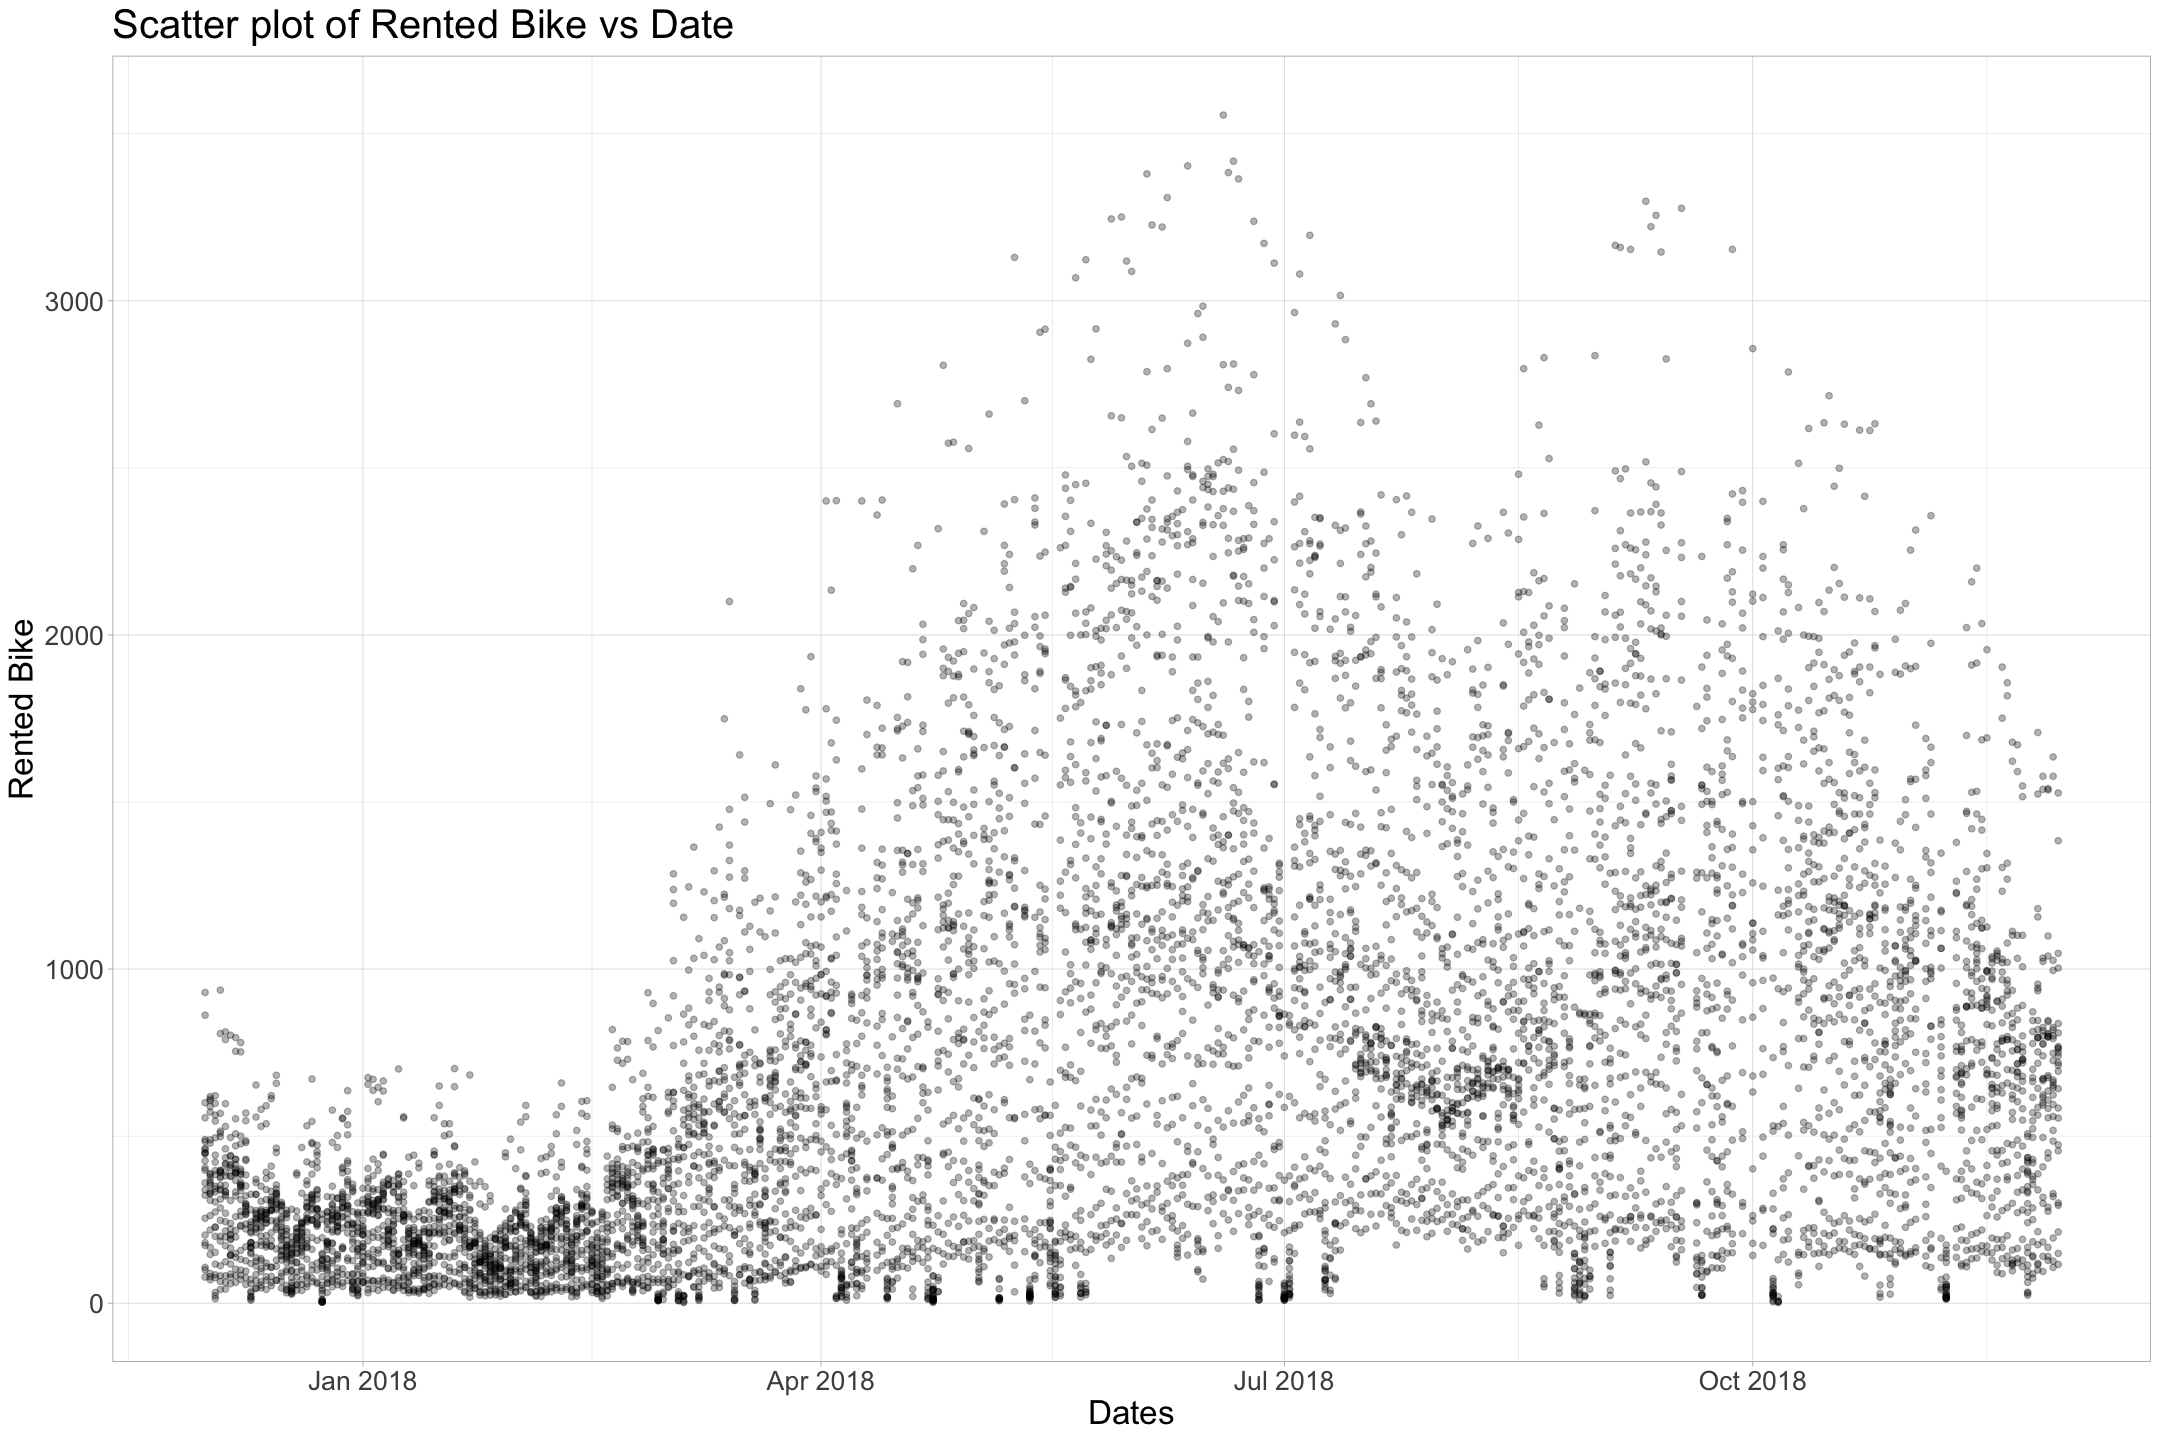

In [75]:
# Scatter plot of rented bike time series
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT)) + 
    geom_point(alpha=0.3) +
    labs(x = 'Dates',
        y = 'Rented Bike',
        title = 'Scatter plot of Rented Bike vs Date') +
    theme_light() +
    theme(
        text = element_text(size = 20)
    )

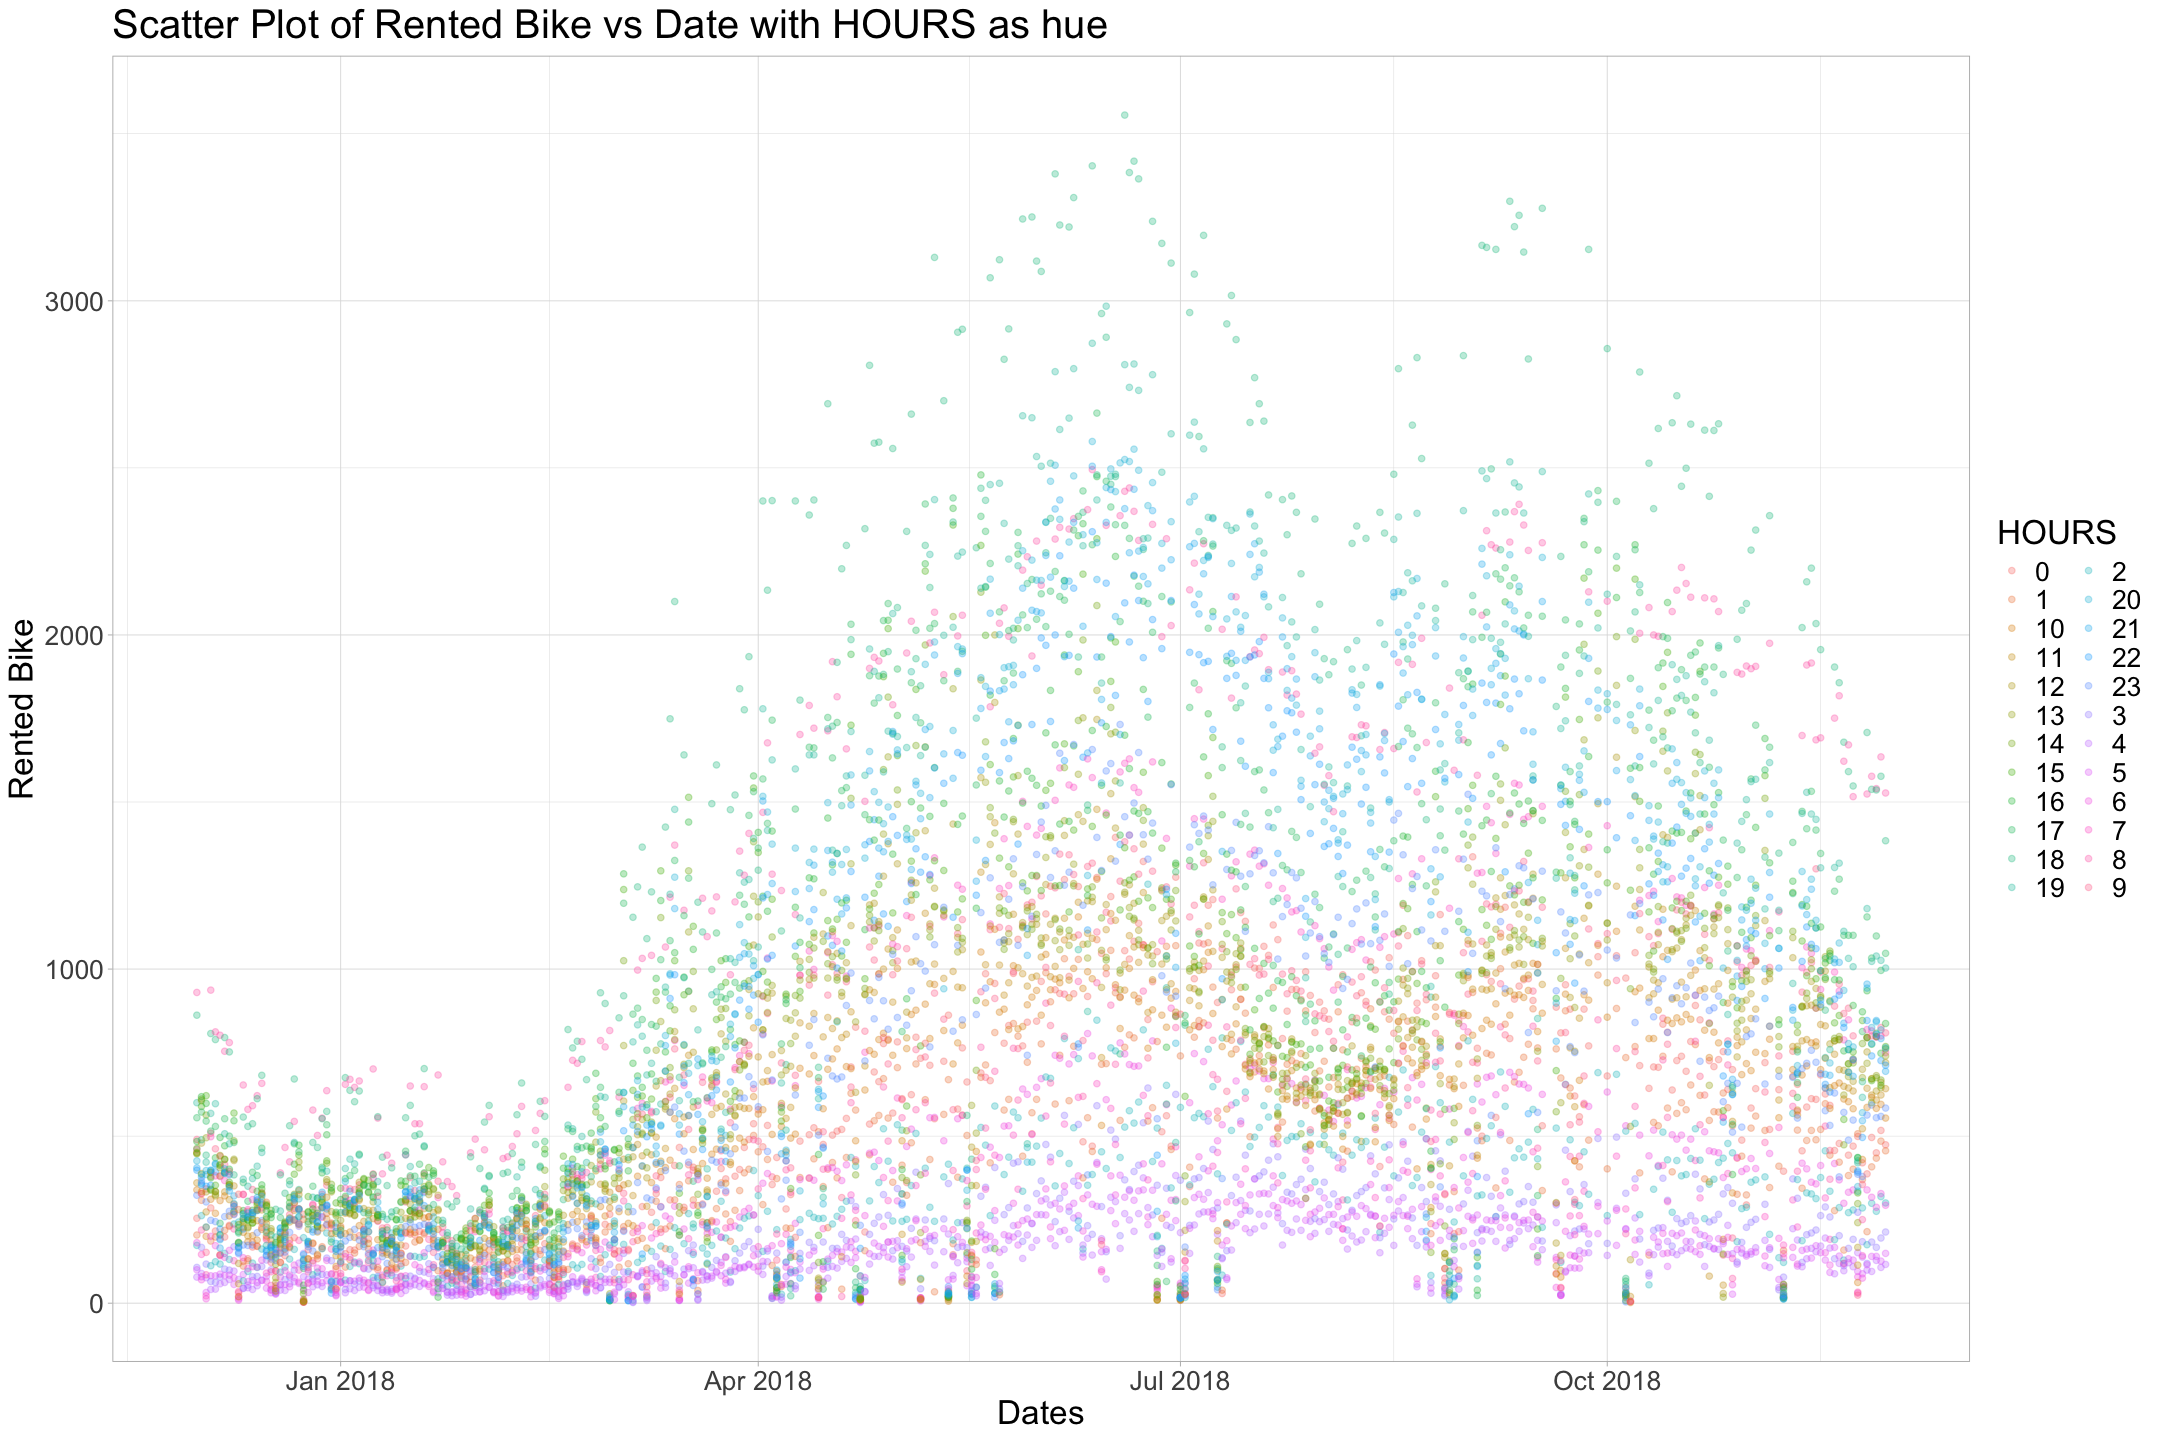

In [76]:
# Scatter plot of the RENTED_BIKE_COUNT time series with HOURS as the colour
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = HOUR)) +
  geom_point(alpha = 0.3) +
  labs(x = 'Dates',
       y = 'Rented Bike',
       color = 'HOURS',
       title = 'Scatter Plot of Rented Bike vs Date with HOURS as hue') +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

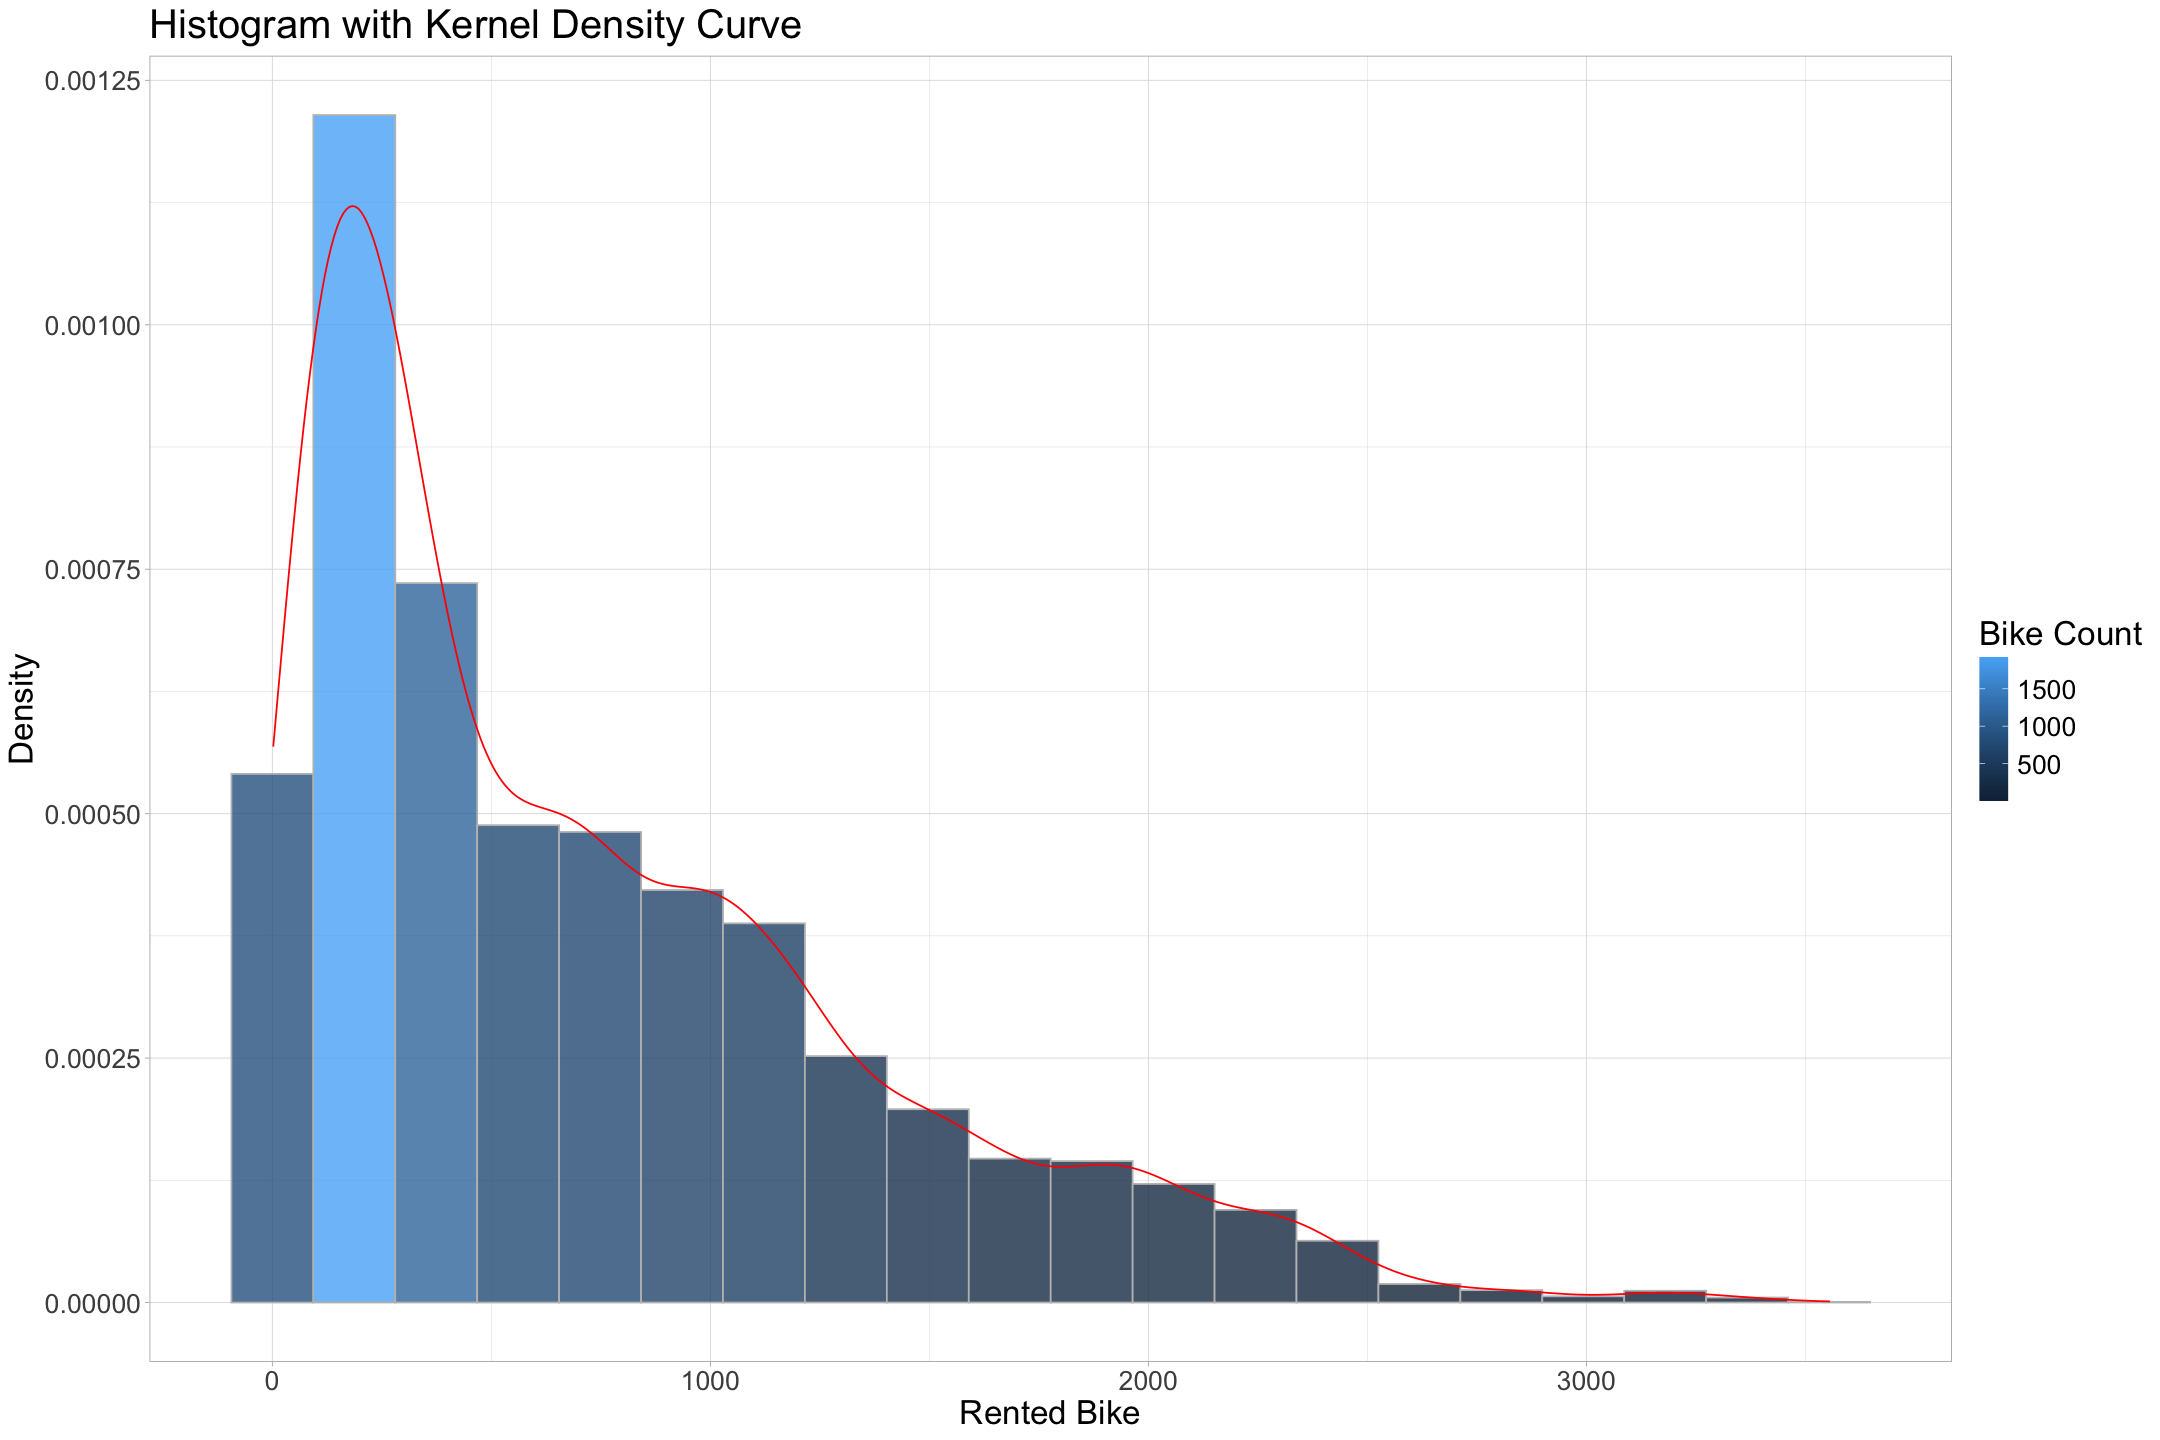

In [78]:
# Histogram with a kernel density curve
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT, y = after_stat(density))) +
  geom_histogram(aes(fill = after_stat(count)), color = "gray", alpha = 4/5, bins = 20) +
  geom_density(color = "red") +
  labs(title = "Histogram with Kernel Density Curve",
       x = "Rented Bike",
       y = "Density",
       fill = 'Bike Count') +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

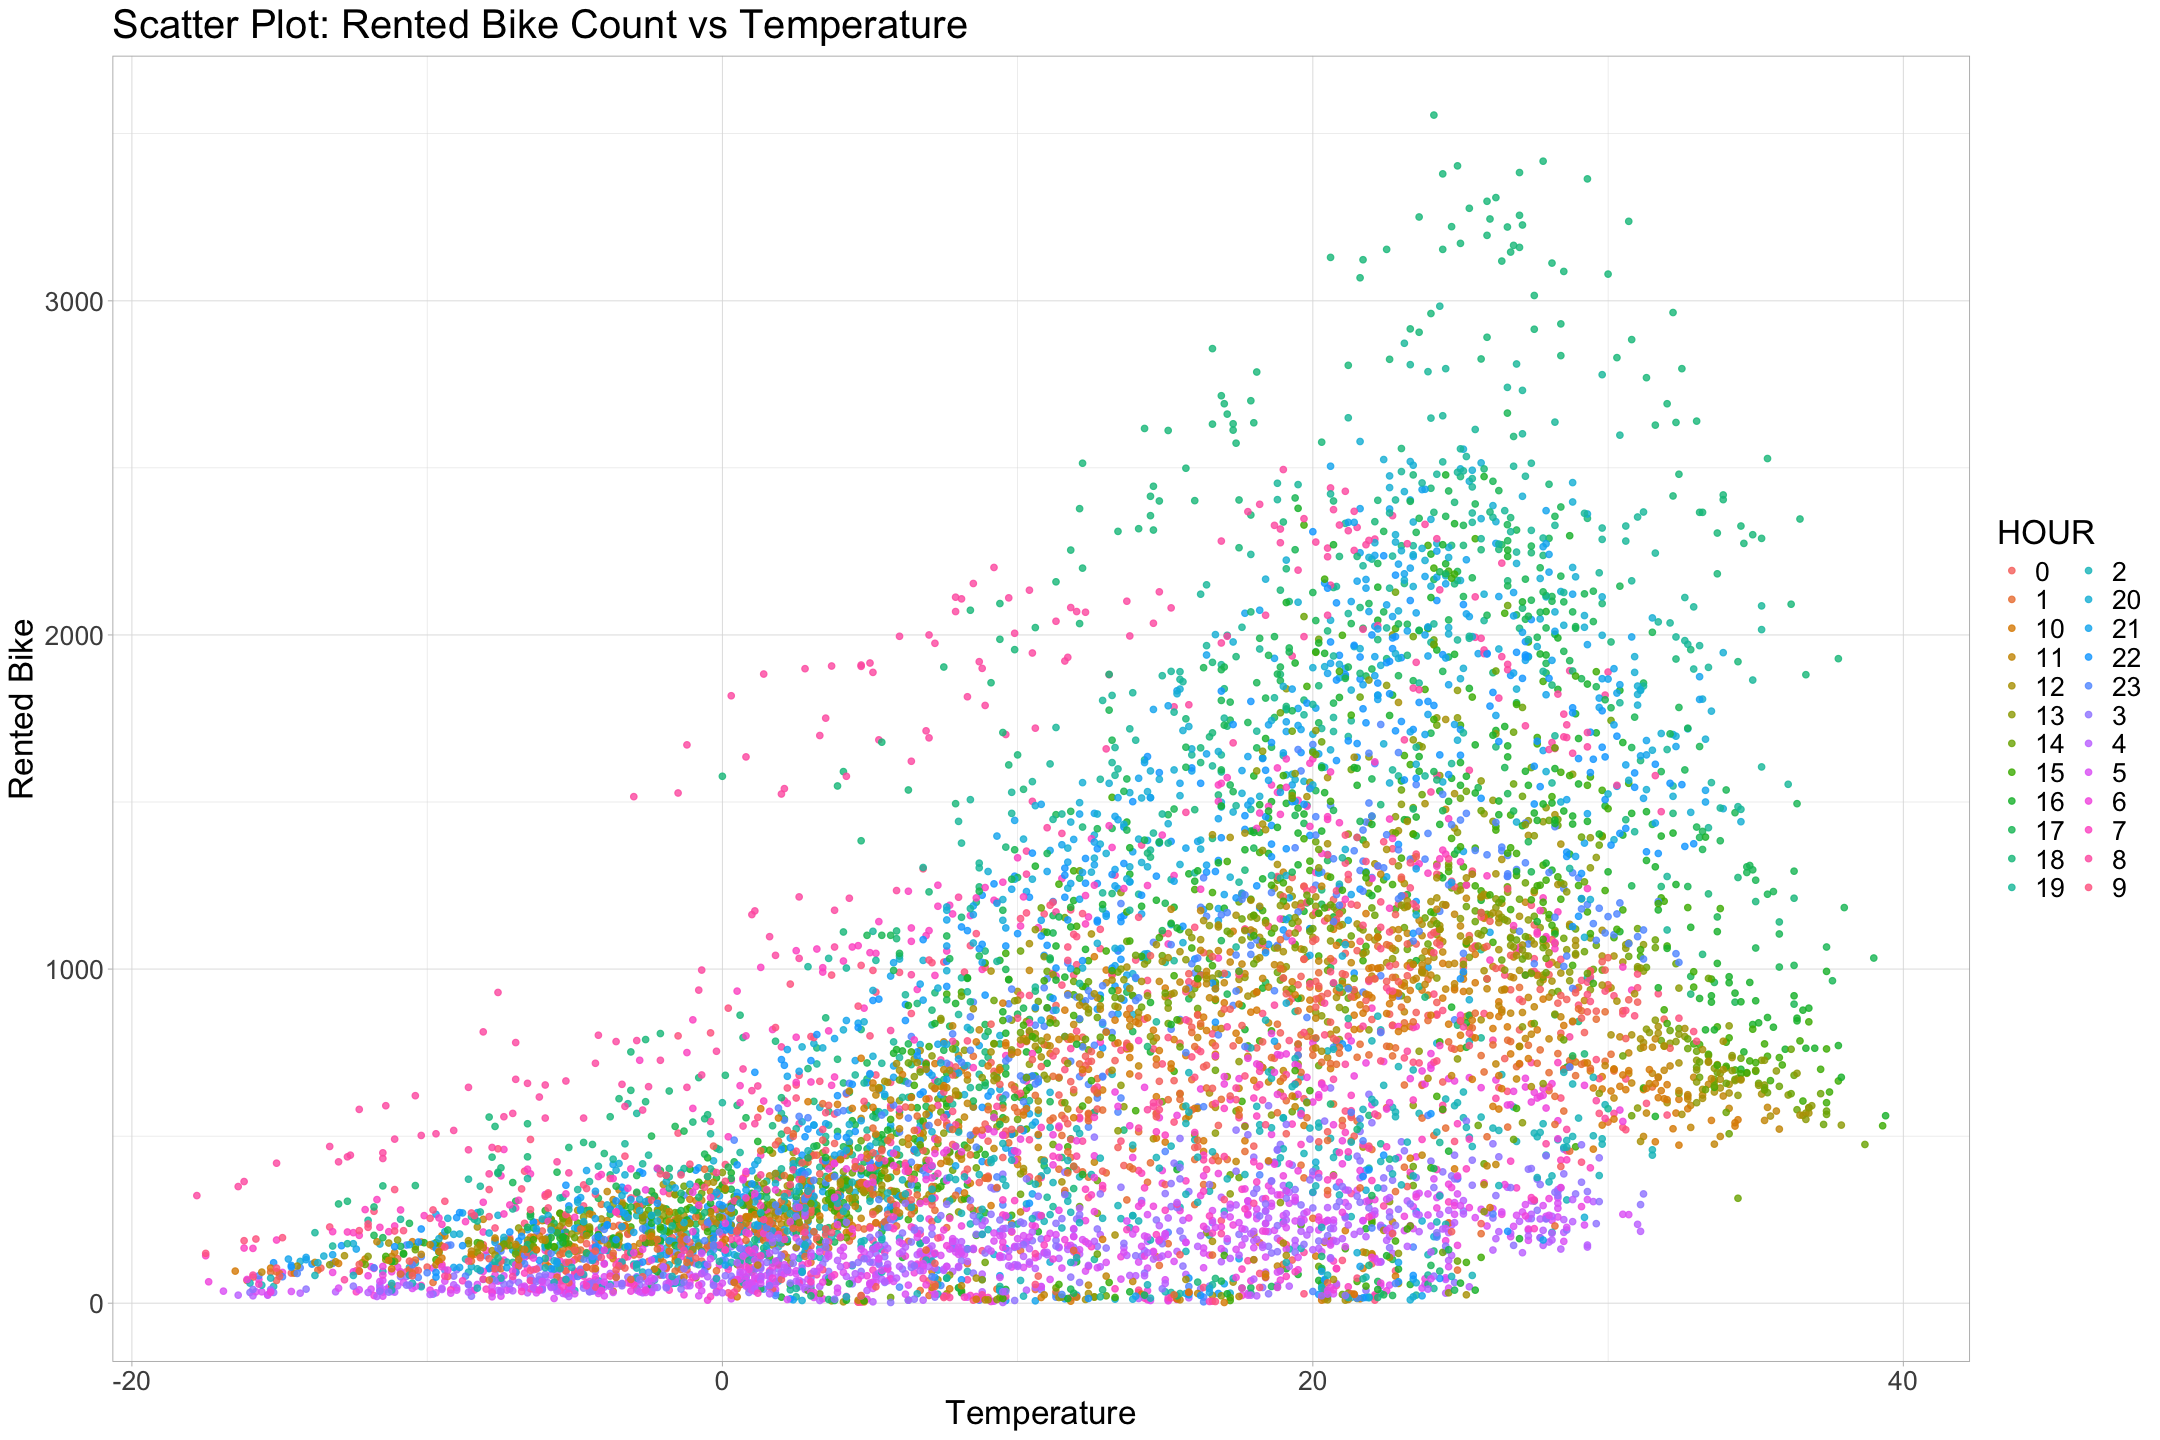

In [79]:
# Scatter plot showing the relationship between rented bike count and temperature
ggplot(seoul_bike_sharing, aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR)) +
   geom_point(alpha=4/5) + 
  labs(title = "Scatter Plot: Rented Bike Count vs Temperature",
       x = "Temperature",
       y = "Rented Bike") +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

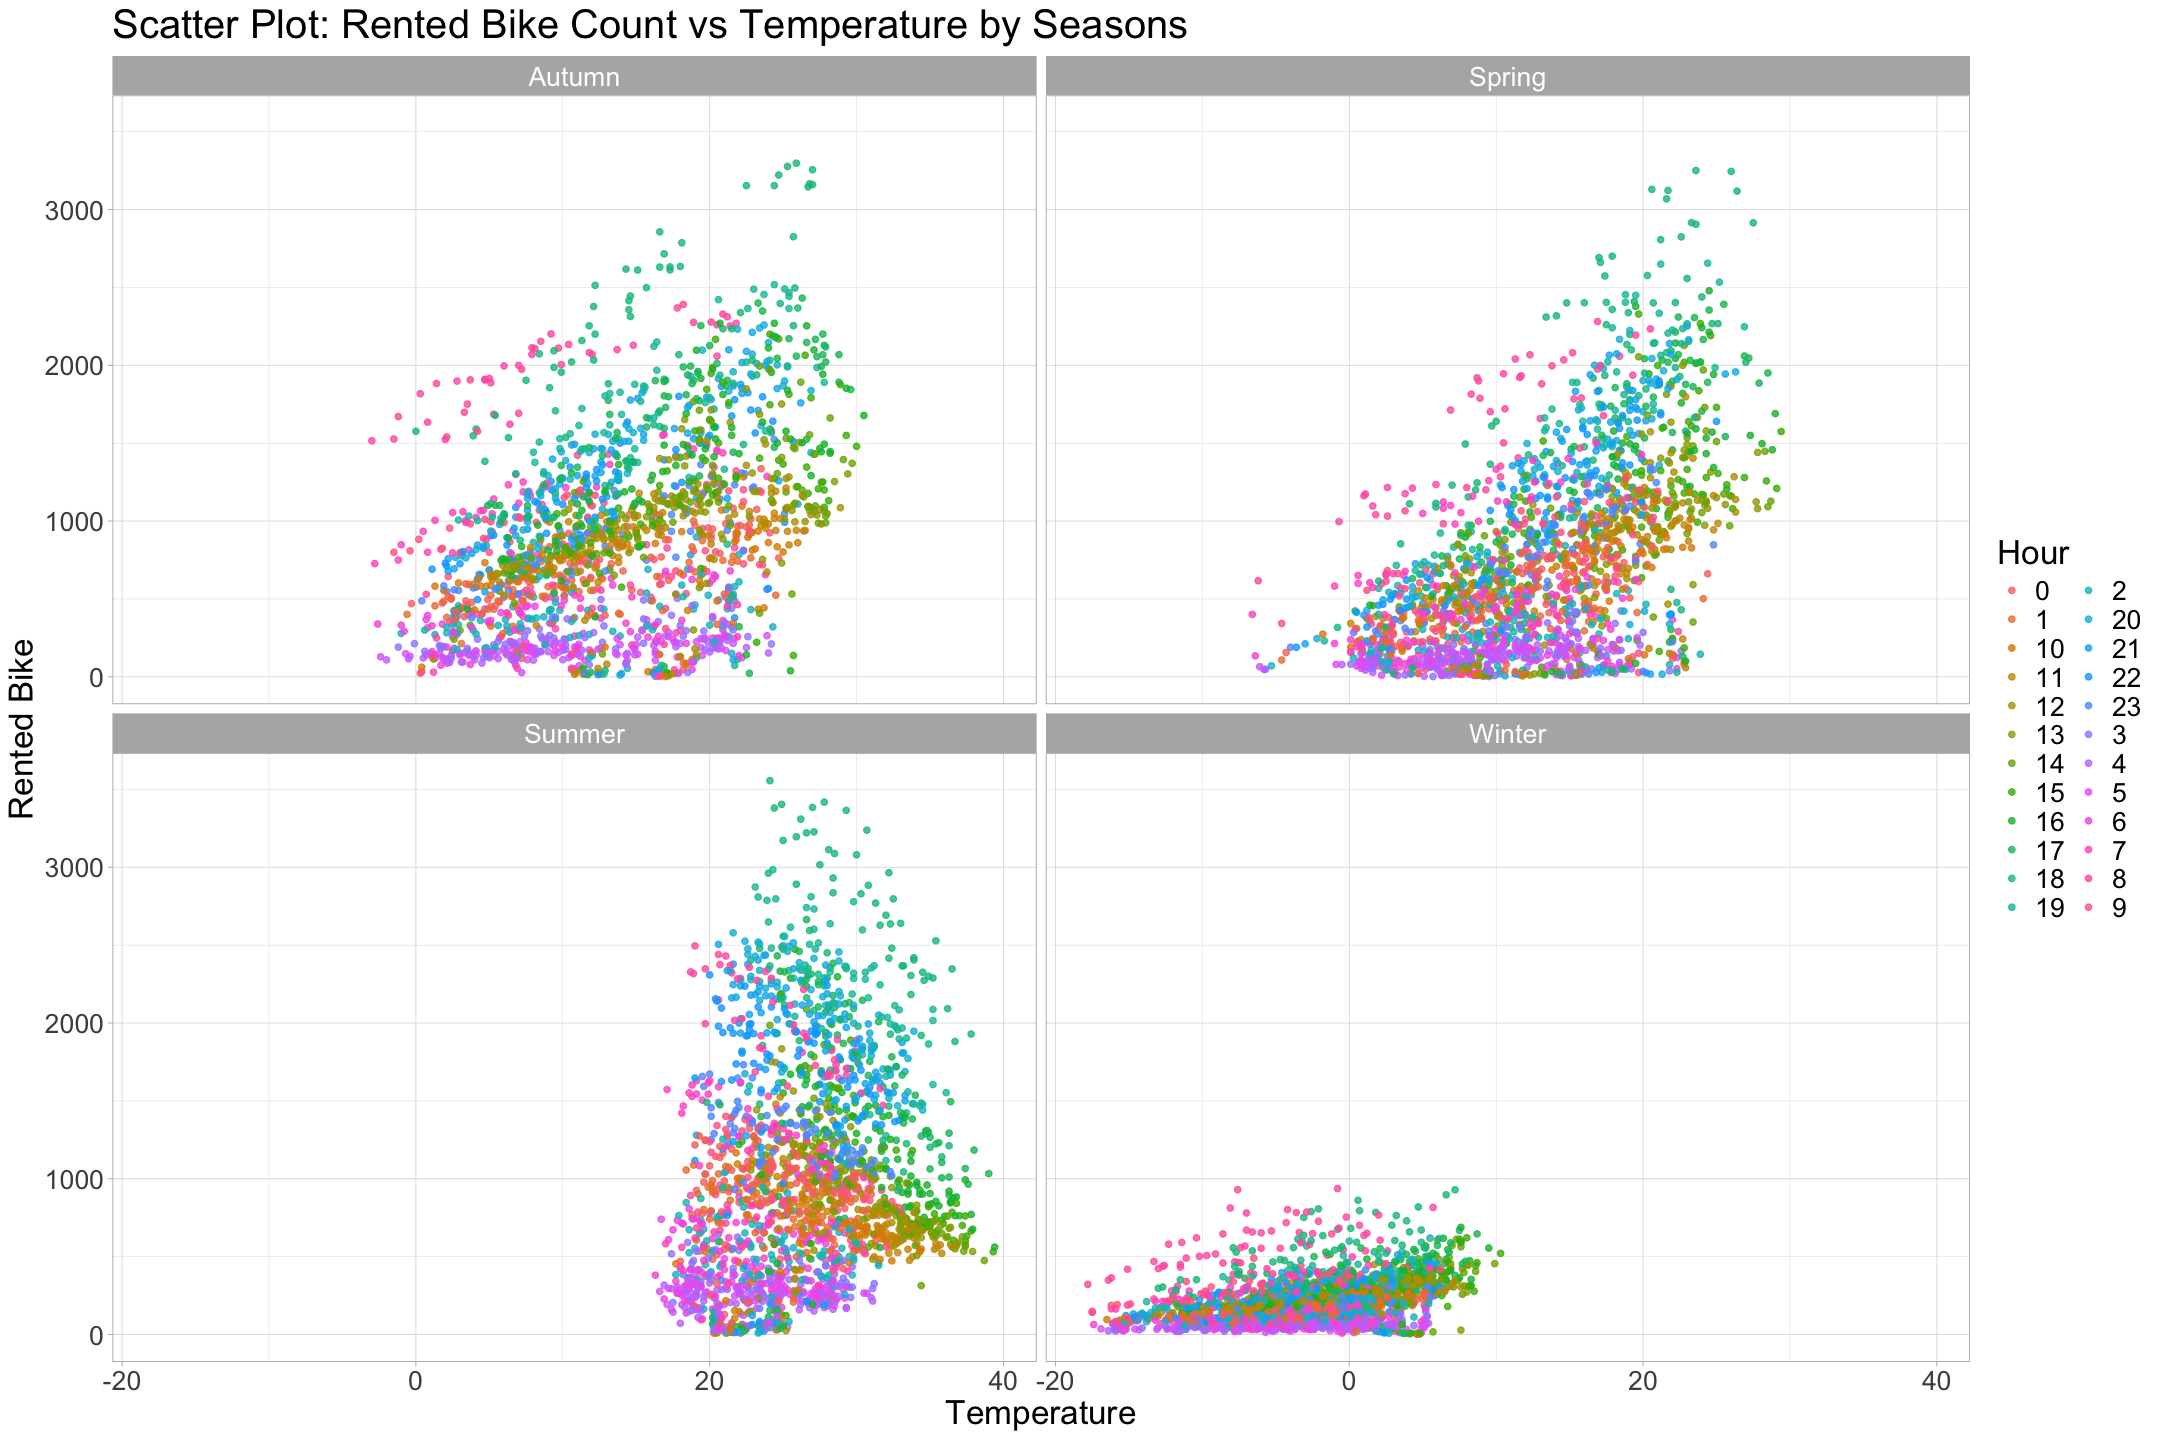

In [80]:
# Scatter plot showing the correlation between rented bike count and temperature by seasons
ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = HOUR)) +
  geom_point(alpha = 4/5) +
  facet_wrap(~ as.factor(SEASONS)) + 
  labs(title = "Scatter Plot: Rented Bike Count vs Temperature by Seasons",
       x = "Temperature",
       y = "Rented Bike",
       color = "Hour") +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

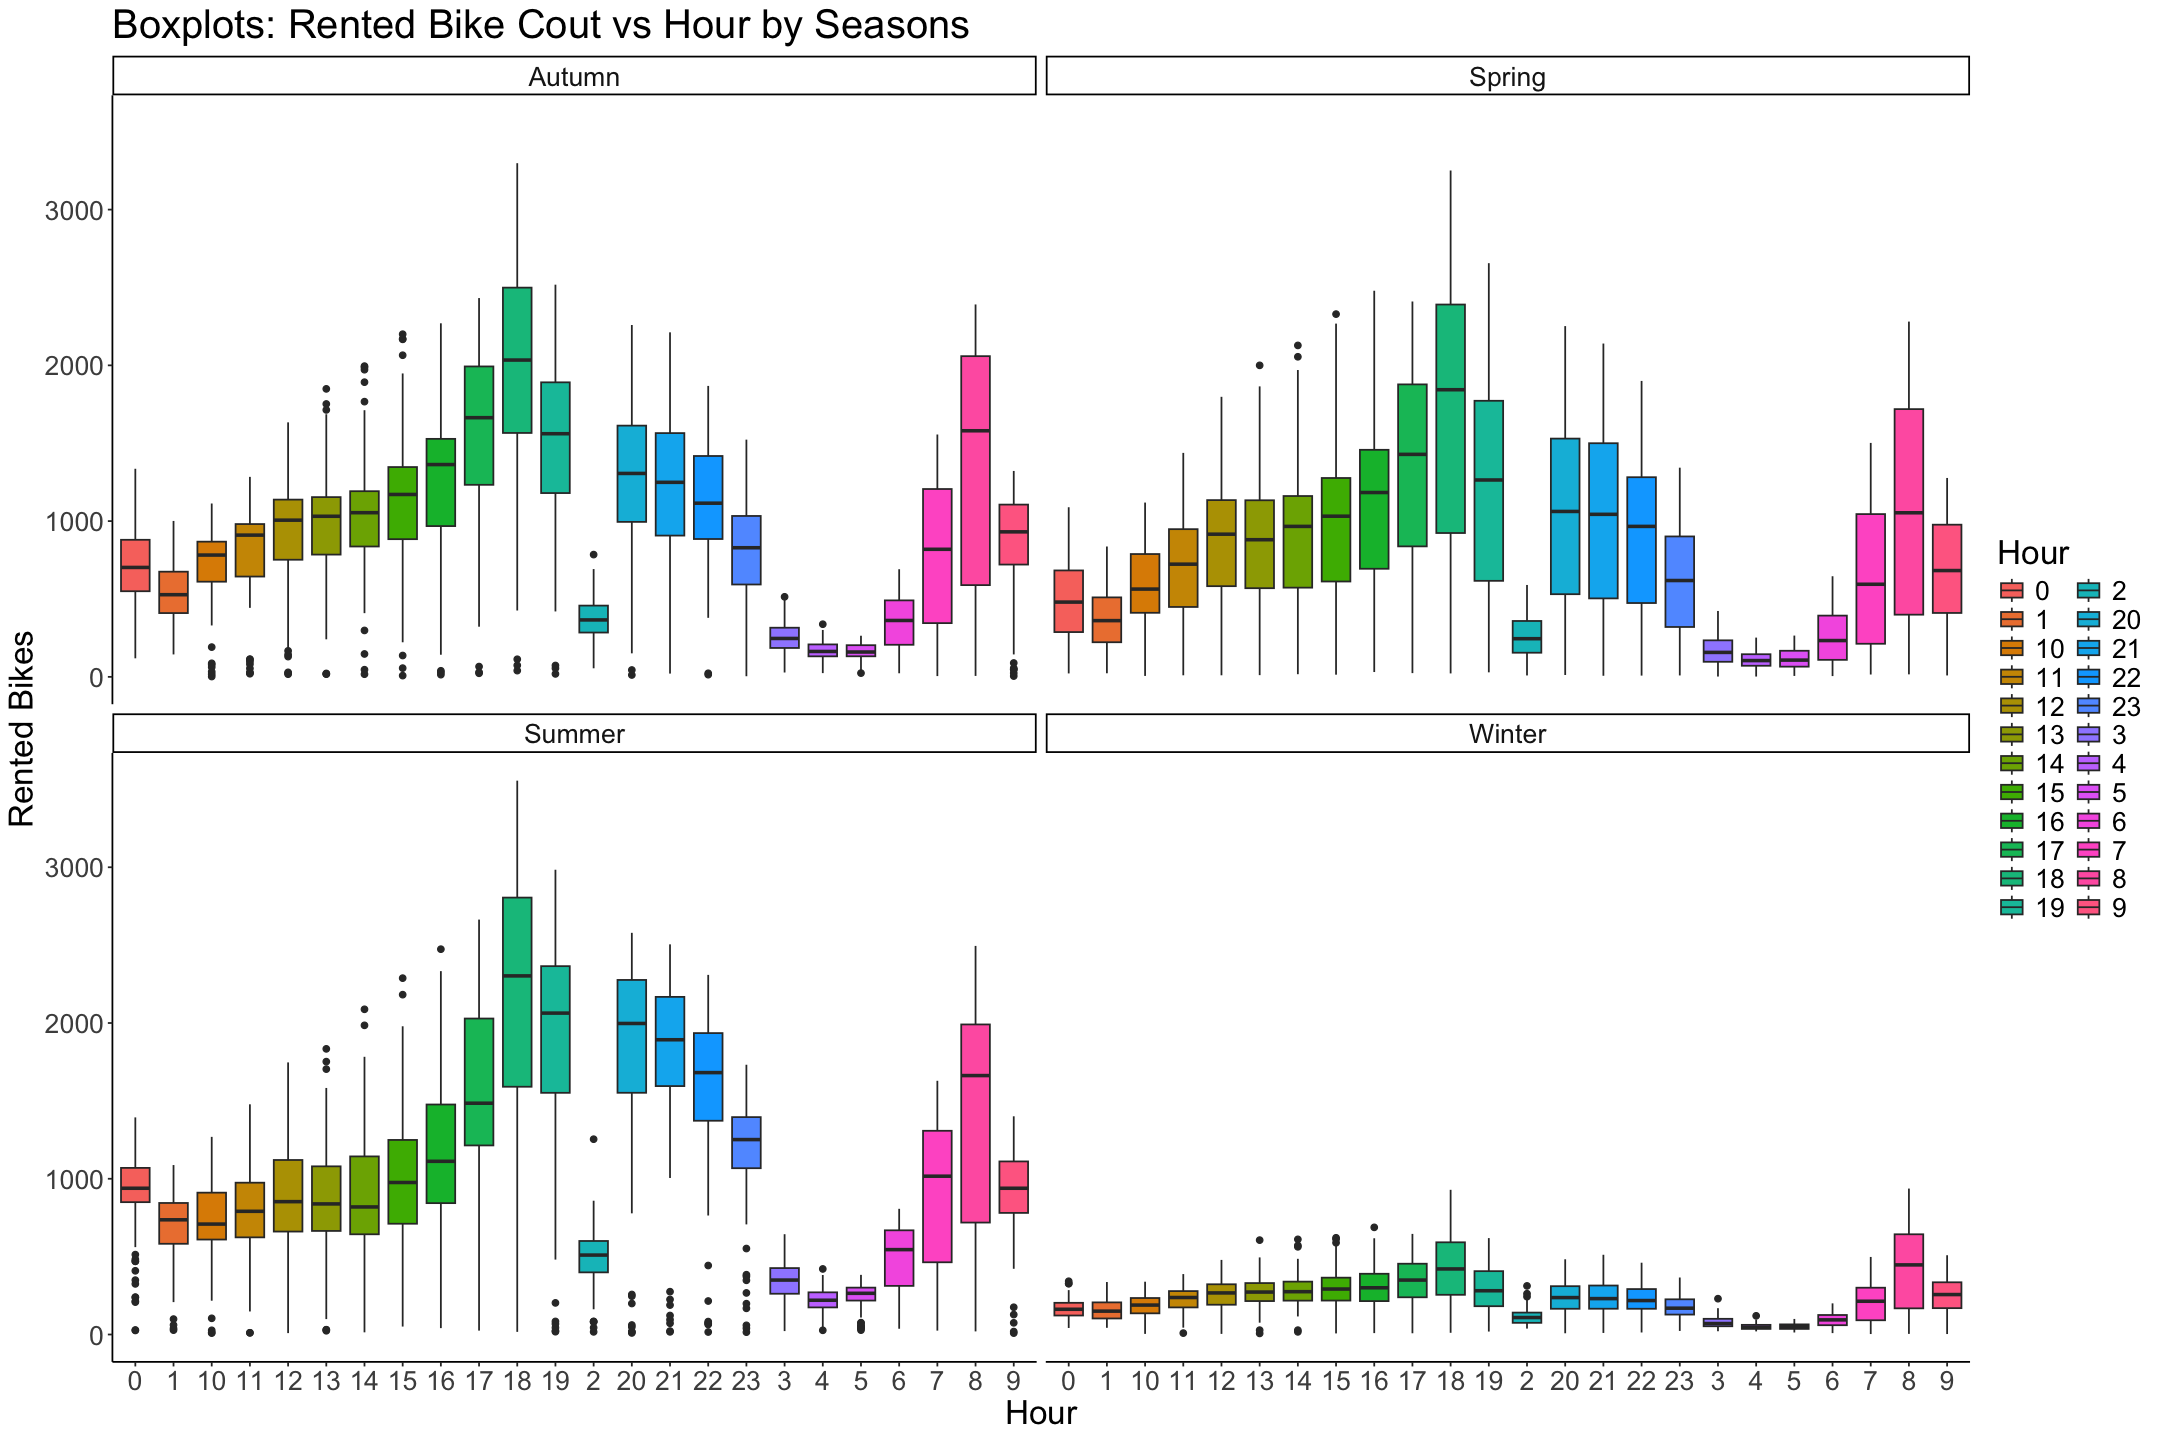

In [81]:
# Boxplot of rented bike count vs hour grouped by seasons
ggplot(seoul_bike_sharing, aes(x = HOUR, y = RENTED_BIKE_COUNT, fill = HOUR)) +
  geom_boxplot() +
  facet_wrap(~ as.factor(SEASONS)) +
  labs(title = "Boxplots: Rented Bike Cout vs Hour by Seasons",
       x = "Hour",
       y = "Rented Bikes",
       fill = "Hour") +
  theme_classic() +
    theme(
        text = element_text(size = 20)
    )

In [82]:
# Calculate the total rainfall and snowfall by date
daily_total <- seoul_bike_sharing %>% 
  group_by(DATE) %>%
  summarise(total_rain = sum(RAINFALL, na.rm = TRUE),
            total_snow = sum(SNOWFALL, na.rm = TRUE))
# print values
head(daily_total)

DATE       total_rain total_snow
1 2017-12-01 0.0        0.0       
2 2017-12-02 0.0        0.0       
3 2017-12-03 4.0        0.0       
4 2017-12-04 0.1        0.0       
5 2017-12-05 0.0        0.0       
6 2017-12-06 1.3        8.6

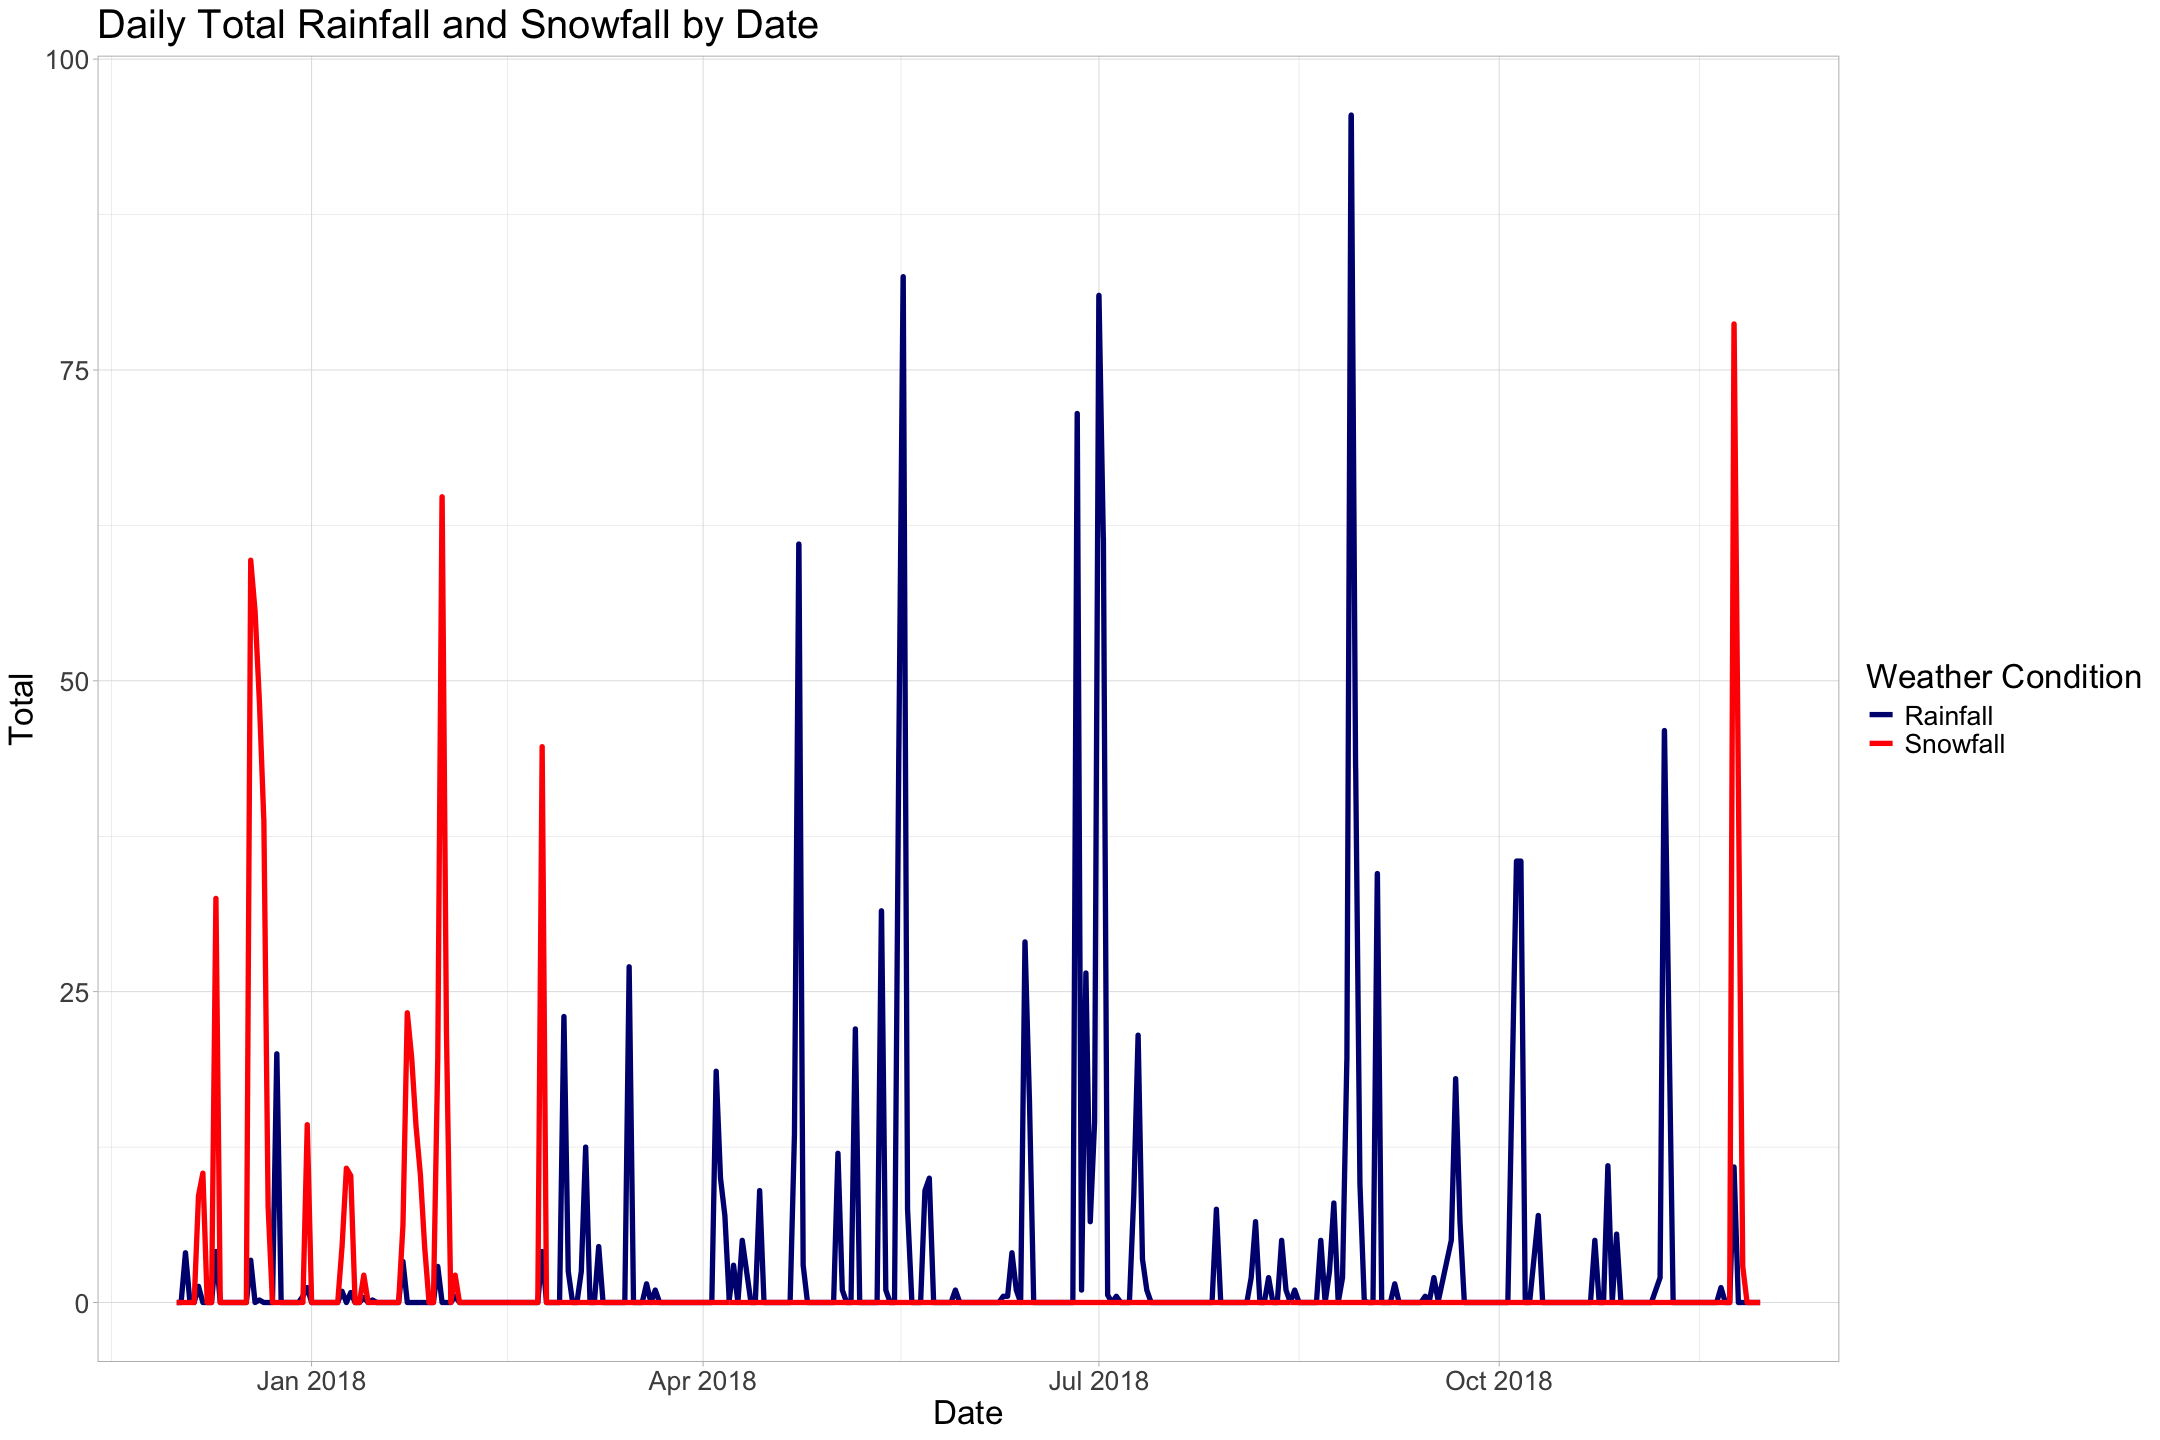

In [83]:
# visualise the total rainfall and snowfall by date
ggplot(daily_total, aes(x = DATE)) + 
    geom_line(aes(y = total_rain, color = 'Rainfall'), linewidth = 1.5) +
    geom_line(aes(y = total_snow, color = 'Snowfall'), linewidth = 1.5) +
    labs(title = "Daily Total Rainfall and Snowfall by Date",
       x = "Date",
       y = "Total",
       color = "Weather Condition") +
    scale_color_manual(values = c("Rainfall" = "navy", "Snowfall" = "red")) +
    theme_light() +
    theme(
        text = element_text(size = 20)
    )

In [84]:
# Calculate how many days had snowfall
snow_days <- paste('Number of days of snowfall:', sum(daily_total$total_snow > 0), 'days')
snow_days

[1] "Number of days of snowfall: 27 days"

### Predictive Modeling of Seoul Bike Rentals Using Linear Regression

In [85]:
seoul_bike_sharing <- read_csv('seoul_bike_sharing_converted_normalized.csv', show_col_types = FALSE)
readr::spec(seoul_bike_sharing)

cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  HOLIDAY = col_double(),
  NO_HOLIDAY = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_do

In [86]:
# Drop the date and functional day variables 
seoul_bike_sharing <- seoul_bike_sharing %>% select(-DATE, -YES)

In [87]:
# Print summary statistics of dataset
summary(seoul_bike_sharing)

 RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY        WIND_SPEED    
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.05965   1st Qu.:0.3636   1st Qu.:0.4286   1st Qu.:0.1216  
 Median :0.15194   Median :0.5472   Median :0.5816   Median :0.2027  
 Mean   :0.20460   Mean   :0.5345   Mean   :0.5933   Mean   :0.2332  
 3rd Qu.:0.30445   3rd Qu.:0.7080   3rd Qu.:0.7551   3rd Qu.:0.3108  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   VISIBILITY     DEW_POINT_TEMPERATURE SOLAR_RADIATION       RAINFALL       
 Min.   :0.0000   Min.   :0.0000        Min.   :0.000000   Min.   :0.000000  
 1st Qu.:0.4602   1st Qu.:0.4412        1st Qu.:0.000000   1st Qu.:0.000000  
 Median :0.8429   Median :0.6107        Median :0.002841   Median :0.000000  
 Mean   :0.7131   Mean   :0.5977        Mean   :0.161326   Mean   :0.004261  
 3rd Qu.:1.0000   3rd Qu.:0.7924        3rd Qu.:0.264205   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000        Ma

#### Split Training and Testing Data

In [88]:
# Use the initial_split(), training(), and testing() functions to split the dataset (set seed to 1234 and prop 3/4

# set seed
set.seed(1234)

# split data variable
split_data <- initial_split(seoul_bike_sharing, prop = 3/4)

# train_data variable
training_data <- training(split_data)

# test_data variable
testing_data <- testing(split_data)

In [89]:
# Print training and test data sets 
paste('Training Dataset:', ceiling(nrow(training_data) / (nrow(training_data) + nrow(testing_data)) * 100), '%')
head(training_data)

paste('Testing Dataset:', floor(nrow(testing_data) / (nrow(training_data) + nrow(testing_data)) * 100), '%')
head(testing_data)

[1] "Training Dataset: 75 %"

RENTED_BIKE_COUNT TEMPERATURE HUMIDITY  WIND_SPEED VISIBILITY
1 0.76364660        0.6066434   0.4795918 0.18918919 0.8160162 
2 0.11733258        0.3776224   0.7040816 0.00000000 0.9974658 
3 0.31063590        0.5716783   0.5102041 0.45945946 0.9944247 
4 0.04276871        0.4178322   0.7346939 0.06756757 0.5195134 
5 0.05346089        0.5000000   0.6020408 0.06756757 1.0000000 
6 0.05936972        0.1853147   0.3877551 0.41891892 1.0000000 
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL HOLIDAY ⋯ 21 22 23 3
1 0.6245675             0.0312500       0        0        0       ⋯ 0  0  0  0
2 0.5069204             0.0000000       0        0        0       ⋯ 0  0  0  0
3 0.6072664             0.3068182       0        0        0       ⋯ 0  0  0  0
4 0.5536332             0.0000000       0        0        0       ⋯ 0  0  0  0
5 0.5813149             0.0000000       0        0        0       ⋯ 0  0  0  1
6 0.1989619             0.0000000       0        0        0       ⋯ 0  1  0  0
  4 5 6 7 8 9
1 0 0 0 0 0 0
2 0 0 1 0 0 0
3 0 0 0 0 0 1
4 1 0 0 0 0 0
5 0 0 0 0 0 0
6 0 0 0 0 0 0

[1] "Testing Dataset: 25 %"

RENTED_BIKE_COUNT TEMPERATURE HUMIDITY  WIND_SPEED VISIBILITY
1 0.02757456        0.1993007   0.3775510 0.2027027  1.0000000 
2 0.05036579        0.1958042   0.3571429 0.1756757  1.0000000 
3 0.10073157        0.3024476   0.2142857 0.1756757  0.9675621 
4 0.15559932        0.3251748   0.5918367 0.2162162  1.0000000 
5 0.16826111        0.3111888   0.7857143 0.2297297  1.0000000 
6 0.11339336        0.2972028   0.8265306 0.1081081  0.8413583 
  DEW_POINT_TEMPERATURE SOLAR_RADIATION RAINFALL SNOWFALL HOLIDAY ⋯ 21 22 23 3
1 0.2058824             0.00000000      0        0        0       ⋯ 0  0  0  0
2 0.1920415             0.00000000      0        0        0       ⋯ 0  0  0  0
3 0.1799308             0.26704545      0        0        0       ⋯ 0  0  0  0
4 0.4169550             0.02272727      0        0        0       ⋯ 0  0  0  0
5 0.4688581             0.00000000      0        0        0       ⋯ 0  0  0  0
6 0.4671280             0.00000000      0        0        0       ⋯ 1  0  0  0
  4 5 6 7 8 9
1 0 1 0 0 0 0
2 0 0 1 0 0 0
3 0 0 0 0 0 0
4 0 0 0 0 0 0
5 0 0 0 0 0 0
6 0 0 0 0 0 0

#### Build a Linear Regression Model 

In [90]:
# Use `linear_reg()` with engine `lm` and mode `regression`
regression_model <- linear_reg() %>% set_engine('lm') %>% set_mode('regression')

In [91]:
# Define response and predictor weather variables
response_weather_variables <- RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + 
                            SOLAR_RADIATION + RAINFALL + SNOWFALL

# Fit the linear regression model using Weather Predictor Variables Only
lr_model_weather <- regression_model %>% fit(response_weather_variables, data=training_data)

In [92]:
# Build a linear regression model using all variables
lr_model_all <- regression_model %>% fit(RENTED_BIKE_COUNT ~ ., data=training_data)

#### Model Evaluation 

In [93]:
# Print weather variables model summary
summary(lr_model_weather$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37942 -0.08273 -0.01612  0.05869  0.65554 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.043530   0.016341   2.664  0.00774 ** 
TEMPERATURE            0.675234   0.073623   9.171  < 2e-16 ***
HUMIDITY              -0.258402   0.035676  -7.243 4.91e-13 ***
WIND_SPEED             0.113806   0.013551   8.399  < 2e-16 ***
VISIBILITY             0.003533   0.006994   0.505  0.61349    
DEW_POINT_TEMPERATURE -0.089187   0.078455  -1.137  0.25567    
SOLAR_RADIATION       -0.125170   0.009760 -12.824  < 2e-16 ***
RAINFALL              -0.496347   0.051392  -9.658  < 2e-16 ***
SNOWFALL               0.089413   0.037023   2.415  0.01576 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

In [94]:
# Print all variables model summary
summary(lr_model_all$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39433 -0.06161 -0.00206  0.05614  0.50103 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.059142   0.014361   4.118 3.87e-05 ***
TEMPERATURE            0.220234   0.059687   3.690 0.000226 ***
HUMIDITY              -0.249496   0.027994  -8.912  < 2e-16 ***
WIND_SPEED             0.008980   0.011332   0.792 0.428165    
VISIBILITY             0.006154   0.005701   1.079 0.280432    
DEW_POINT_TEMPERATURE  0.168354   0.062287   2.703 0.006893 ** 
SOLAR_RADIATION        0.077906   0.011667   6.677 2.64e-11 ***
RAINFALL              -0.580934   0.040314 -14.410  < 2e-16 ***
SNOWFALL               0.073431   0.029122   2.522 0.011709 *  
HOLIDAY               -0.035009   0.006457  -5.422 6.11e-08 ***
NO_HOLIDAY                   NA         NA      NA       NA    
AUTUMN   

In [96]:
# Use the predict() function to generate test results for both models and generate two test results dataframe with a truth column
# Test Results for Weather Predictor Variable 
test_weather_model <- lr_model_weather %>%
  predict(new_data = testing_data) %>%
  mutate(truth = testing_data$RENTED_BIKE_COUNT)
head(test_weather_model)

.pred       truth     
1 0.088784620 0.02757456
2 0.089855758 0.05036579
3 0.166319005 0.10073157
4 0.098275560 0.15559932
5 0.038486997 0.16826111
6 0.004248758 0.11339336

In [97]:
# Test Results for all Predictor Variable
test_all_model <- lr_model_all %>%
  predict(new_data = testing_data) %>%
  mutate(truth = testing_data$RENTED_BIKE_COUNT)
head(test_all_model)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.pred        truth     
1 -0.050586471 0.02757456
2 -0.004211521 0.05036579
3  0.061309819 0.10073157
4  0.149131191 0.15559932
5  0.165950258 0.16826111
6  0.128827936 0.11339336

In [98]:
# Calculate R-squared and RMSE metrics for the weather and all variable test results

# R-squared Metric
r_squared_weather <- rsq(test_weather_model, truth = truth, estimate = .pred)
rmse_weather <- rmse(test_weather_model, truth = truth, estimate = .pred)

# RMSE metric
r_squared_all <- rsq(test_all_model, truth = truth, estimate = .pred)
rmse_all <- rmse(test_all_model, truth = truth, estimate = .pred)

# Print Results
print('R-squared and RMSE metrics for Weather Predictor Variables')
r_squared_weather
rmse_weather
print('R-squared and RMSE metrics for all Predictors Variables')
r_squared_all
rmse_all

[1] "R-squared and RMSE metrics for Weather Predictor Variables"


.metric .estimator .estimate
1 rsq     standard   0.4388661

.metric .estimator .estimate
1 rmse    standard   0.1335466

[1] "R-squared and RMSE metrics for all Predictors Variables"


.metric .estimator .estimate
1 rsq     standard   0.6690204

.metric .estimator .estimate
1 rmse    standard   0.102539

#### Feature Importance

In [99]:
# Sort and order coefficient list
# Define a variable to hold the model coefficient
coefficient_all_variables <- lr_model_all$fit$coefficient

# Handle NAs 
coefficient_all_variables <- coefficient_all_variables %>% na.omit(coefficient_all_variables)

# Extract the names and values from the list
coefficient_names <- names(coefficient_all_variables)
coefficient_values <- unname(coefficient_all_variables)

# Write names and values to a data frame
coefficient_df <- data.frame(
    Variables = coefficient_names, 
    Coefficients = coefficient_values
)

# Print data frame
head(coefficient_df)

Variables             Coefficients
1 (Intercept)            0.059142172
2 TEMPERATURE            0.220234321
3 HUMIDITY              -0.249495671
4 WIND_SPEED             0.008979536
5 VISIBILITY             0.006154176
6 DEW_POINT_TEMPERATURE  0.168354481

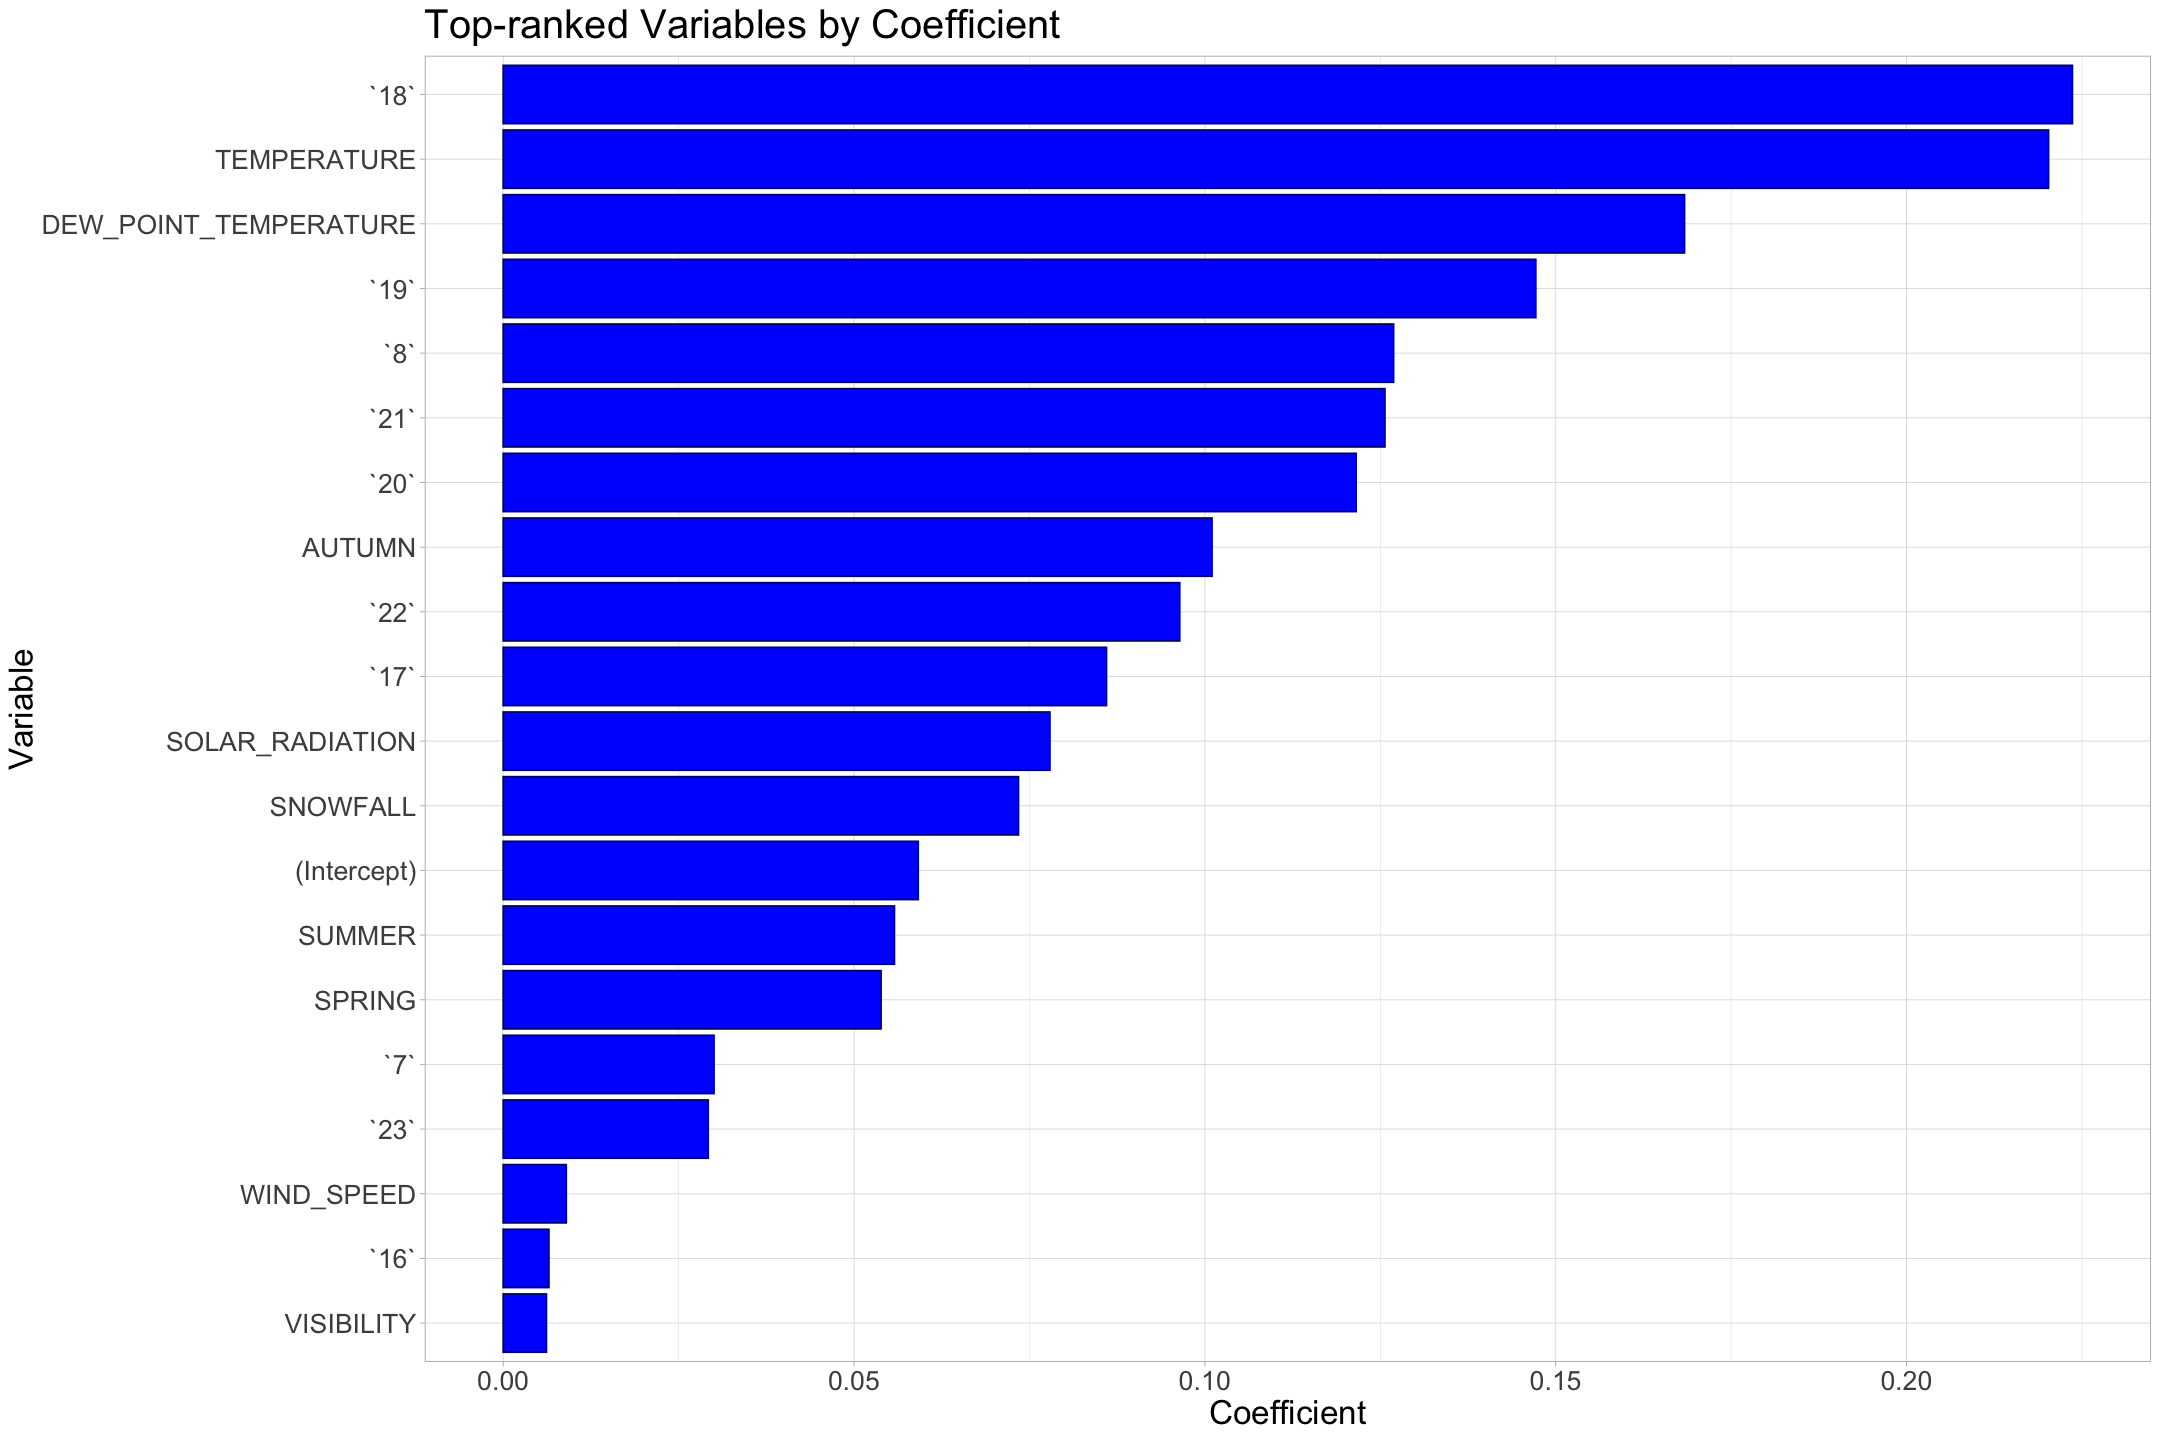

In [100]:
# Filter positive coefficient values
filter_positive_coefficient_df <- coefficient_df %>% dplyr::filter(Coefficients >= 0)

# Visualise the coefficient list using a bar chart
ggplot(filter_positive_coefficient_df, aes(x = Coefficients, y = fct_reorder(Variables, Coefficients, .desc = FALSE))) +
  geom_bar(stat = "identity", fill = "blue", color = "navy") +
  labs(title = "Top-ranked Variables by Coefficient", x = "Coefficient", y = "Variable") +
  theme_light() +
    theme(
        text = element_text(size = 20)
    ) 

### Refine the Baseline Regression Model

#### Add Polynomial Terms

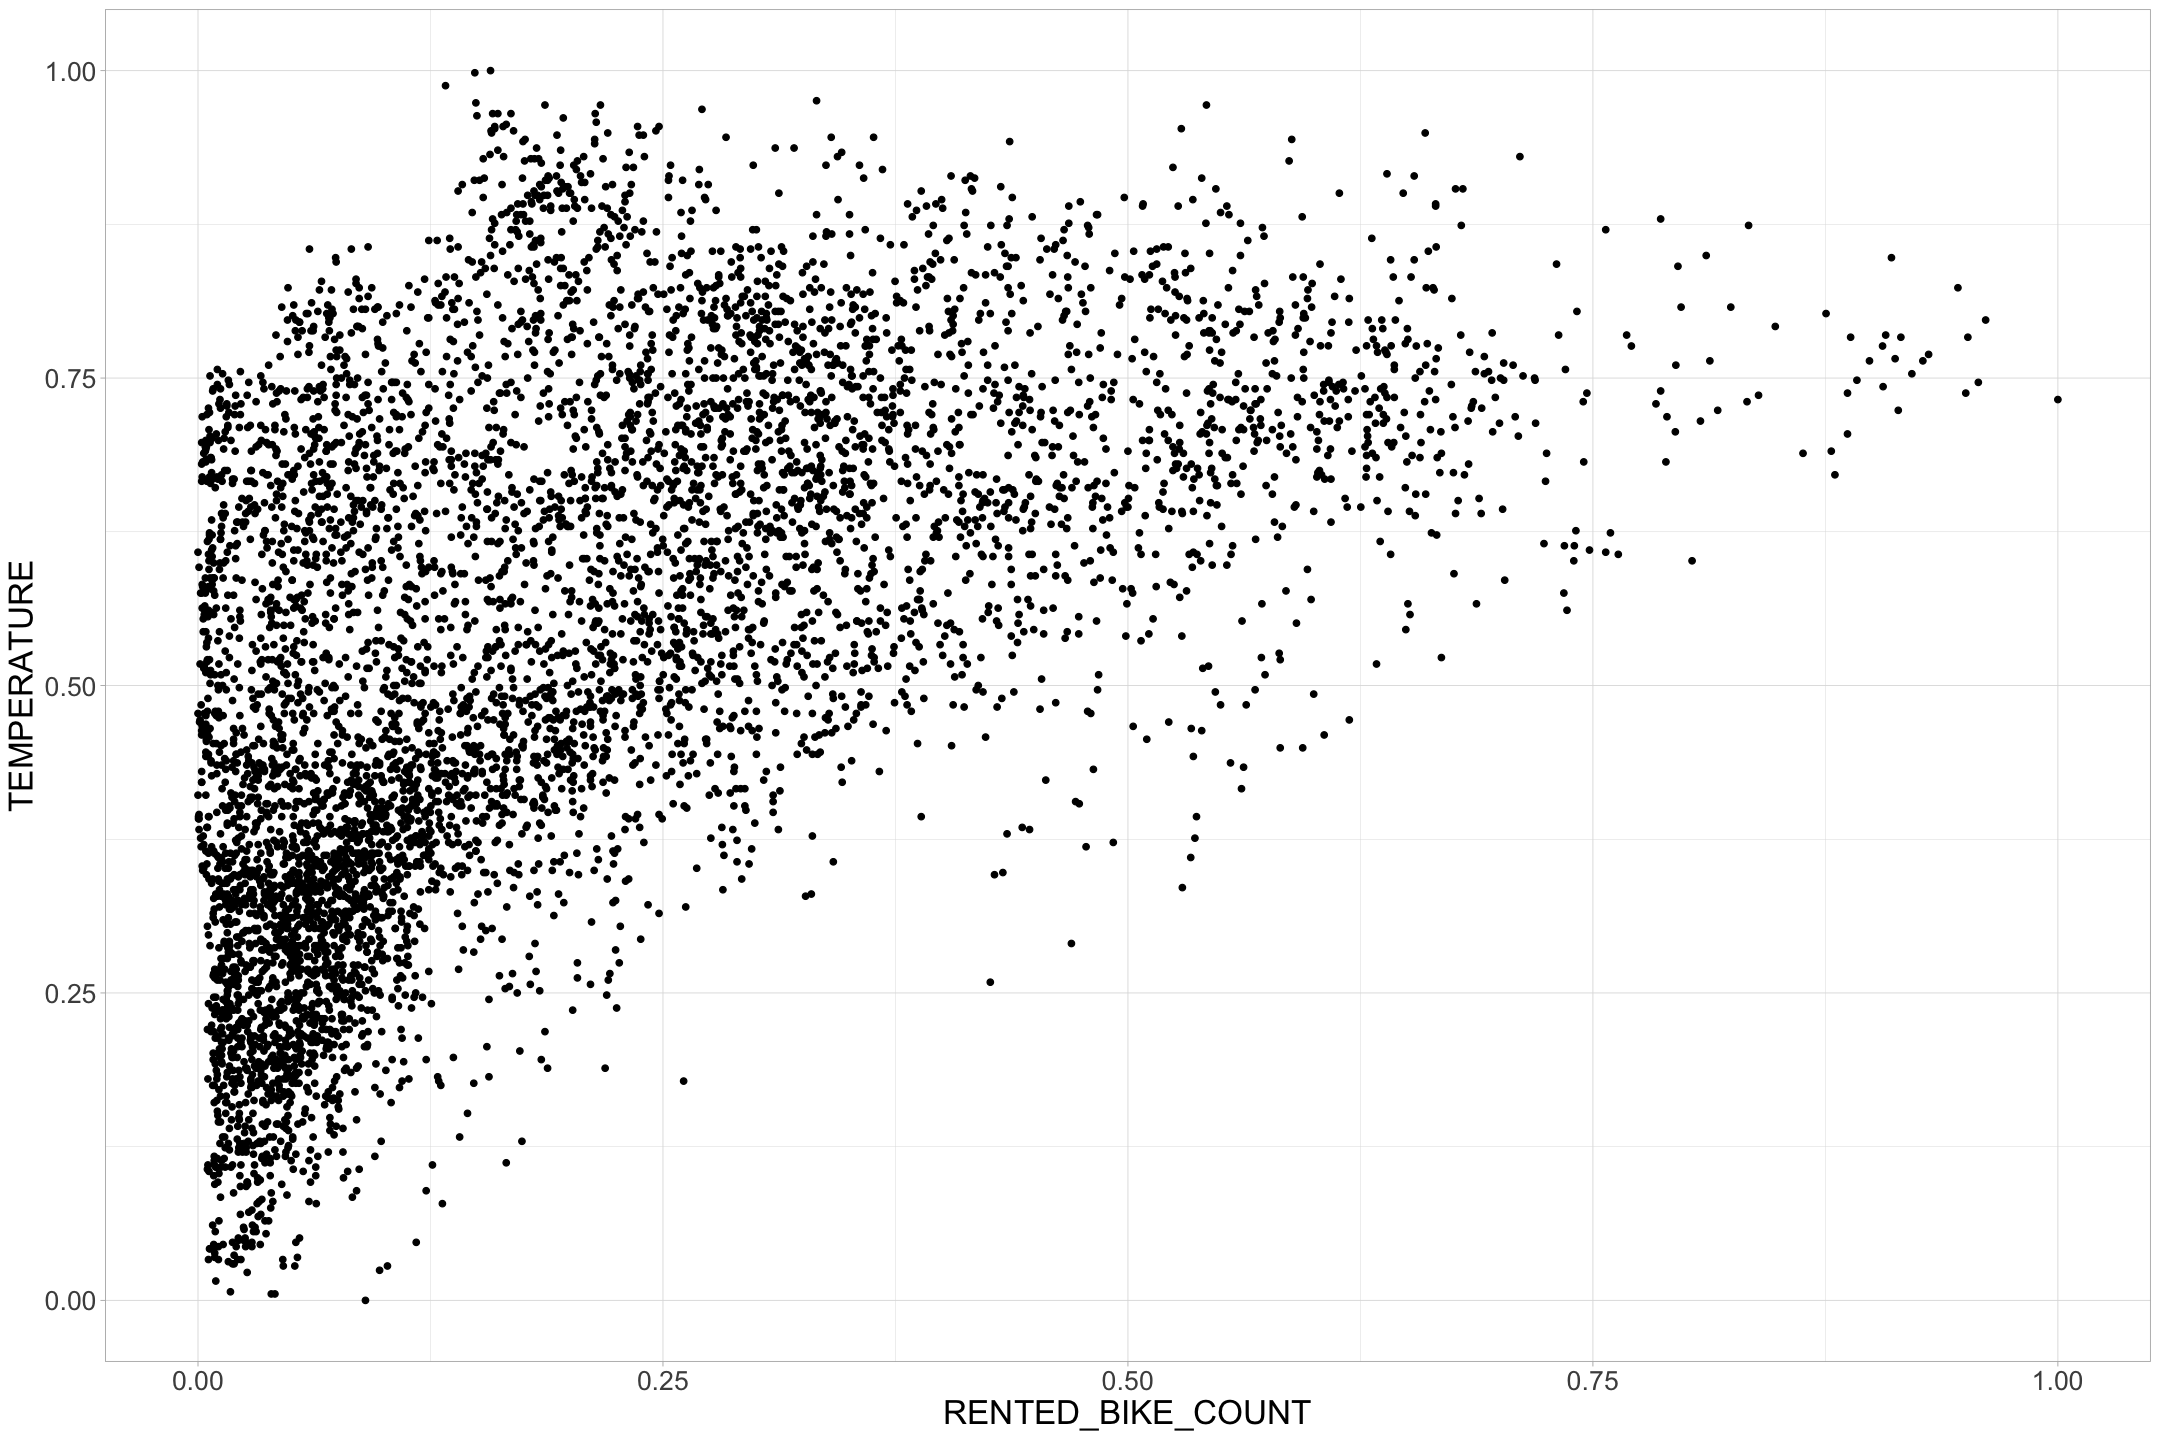

In [101]:
# Visualise correlations between rented bike count and temperature
ggplot(data = training_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

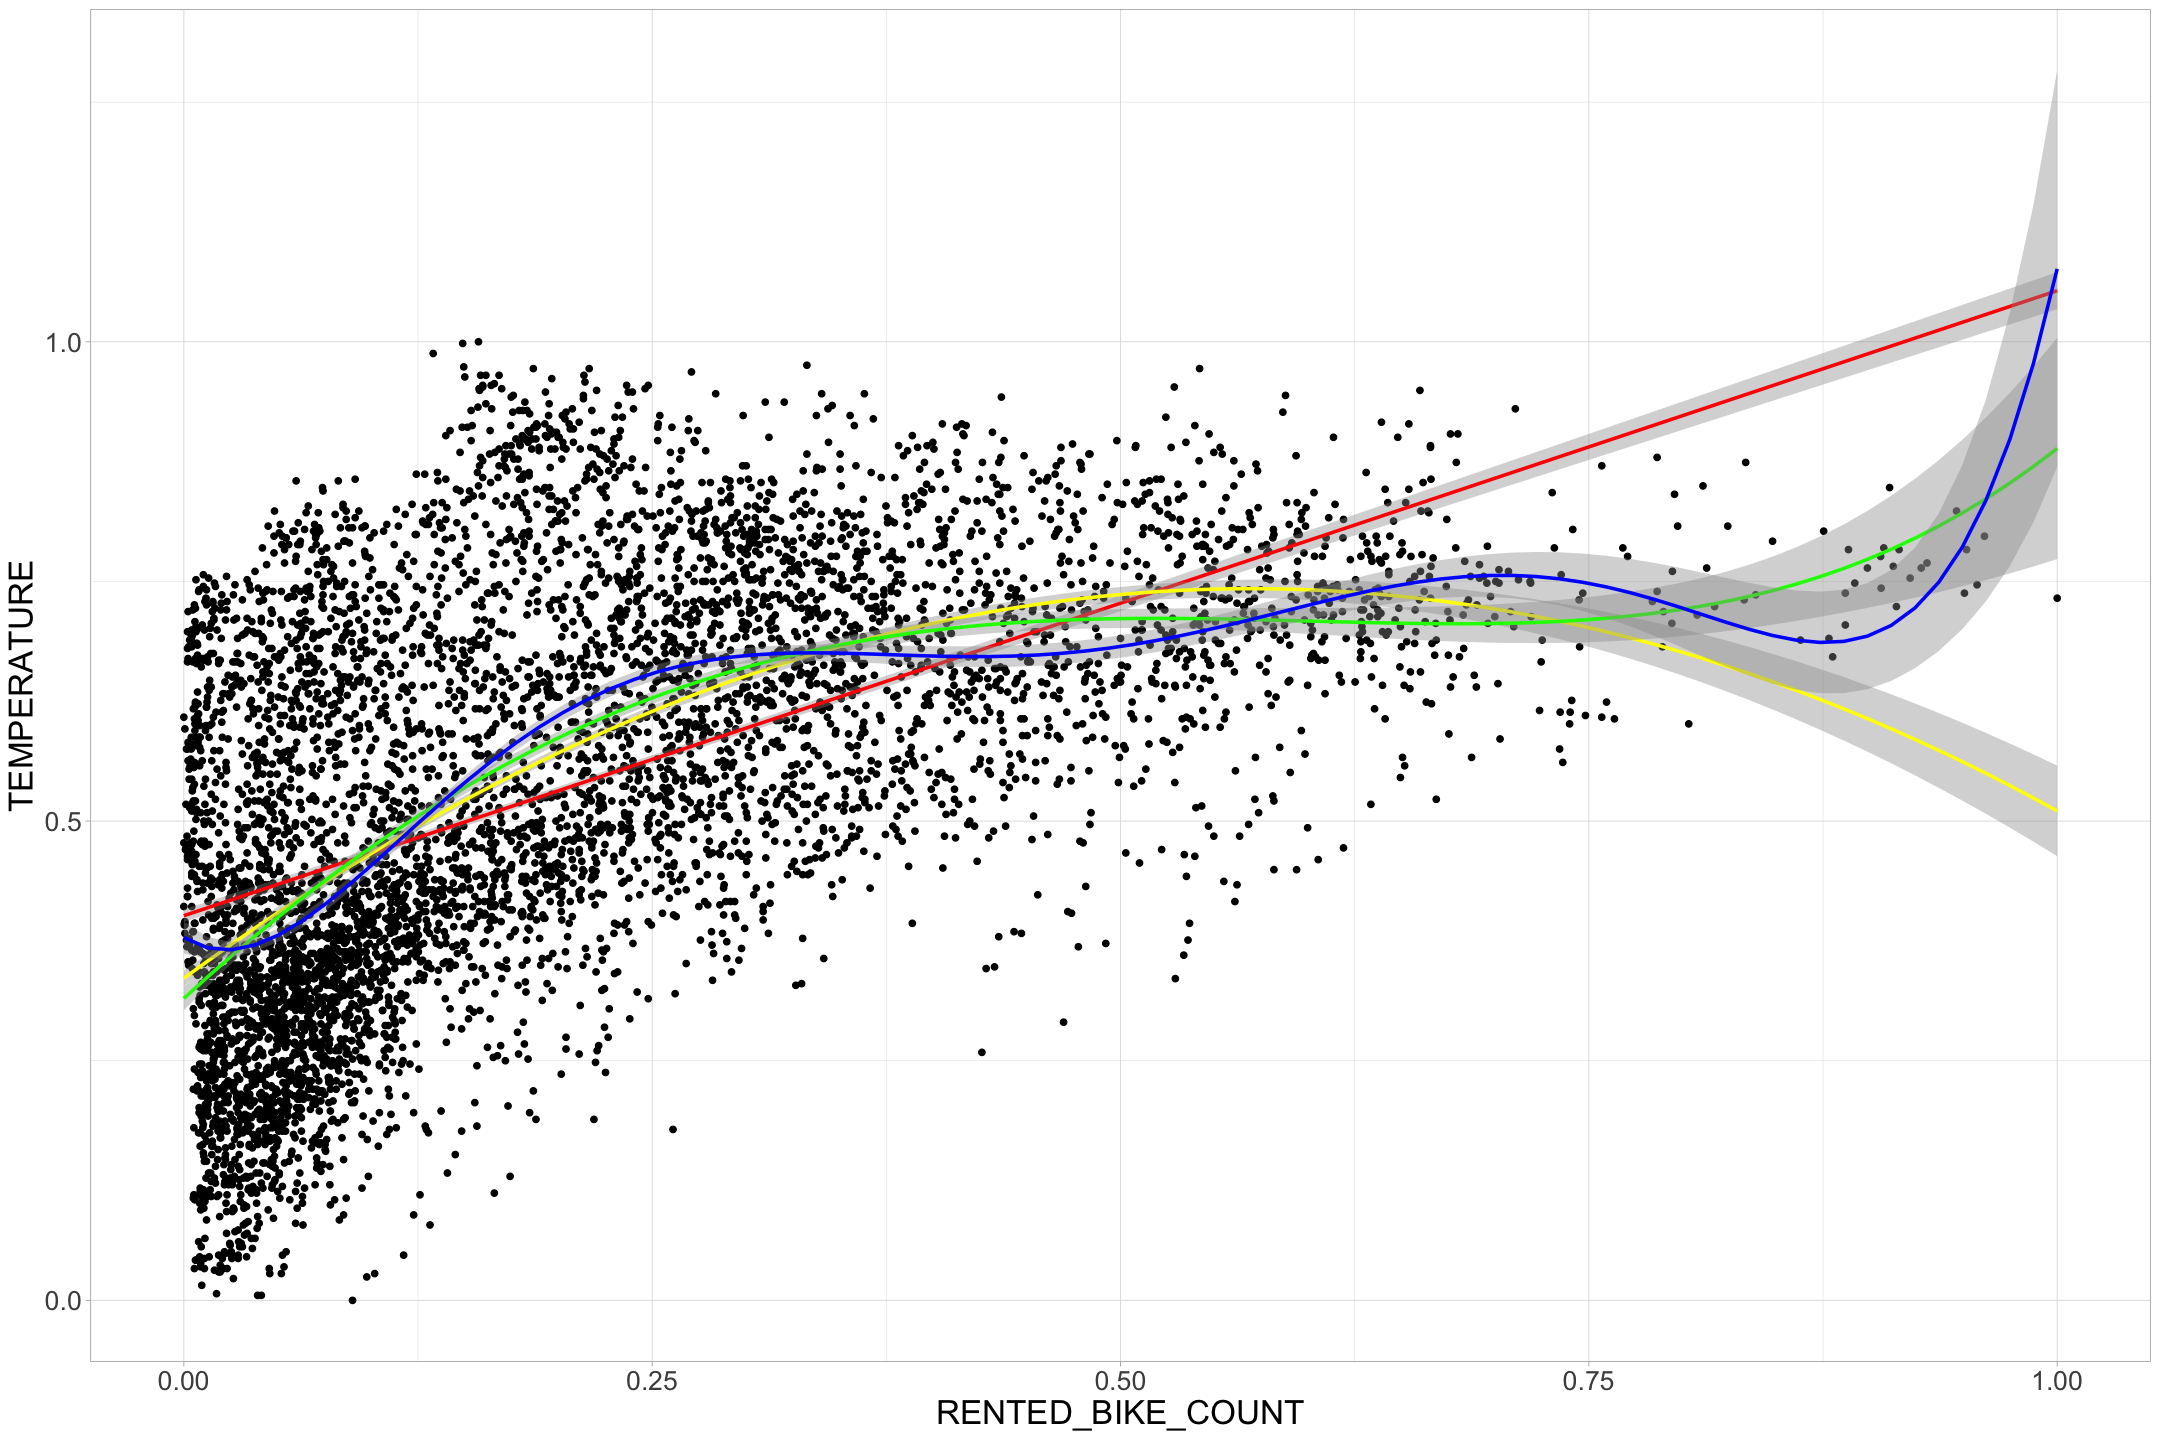

In [102]:
# Plot the higher-order polynomial fits
ggplot(data=training_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ x, color="red") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue") +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

In [103]:
# Fit a Polynomial Terms
lm_polynomial_terms <- regression_model %>% fit(RENTED_BIKE_COUNT ~ poly(VISIBILITY, 6) + poly(DEW_POINT_TEMPERATURE, 6) +  
                           poly(TEMPERATURE, 4) + poly(SOLAR_RADIATION, 4) + poly(HUMIDITY, 4) + poly(WIND_SPEED, 2) + poly(RAINFALL, 2) + 
                           poly(SNOWFALL, 2) + ., data=training_data)

In [104]:
# Print summary
summary(lm_polynomial_terms$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(VISIBILITY, 6) + 
    poly(DEW_POINT_TEMPERATURE, 6) + poly(TEMPERATURE, 4) + poly(SOLAR_RADIATION, 
    4) + poly(HUMIDITY, 4) + poly(WIND_SPEED, 2) + poly(RAINFALL, 
    2) + poly(SNOWFALL, 2) + ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50907 -0.05266  0.00081  0.04959  0.37428 

Coefficients: (11 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      8.573e-02  7.539e-03  11.371  < 2e-16 ***
poly(VISIBILITY, 6)1            -2.837e-01  1.266e-01  -2.241 0.025052 *  
poly(VISIBILITY, 6)2             1.604e-01  9.983e-02   1.606 0.108271    
poly(VISIBILITY, 6)3            -3.702e-01  9.397e-02  -3.939 8.26e-05 ***
poly(VISIBILITY, 6)4             1.841e-01  9.238e-02   1.993 0.046333 *  
poly(VISIBILITY, 6)5            -6.394e-02  9.201e-02  -0.695 0.487087    
poly(VISIBILITY, 6)6            -1.712e-01  9.120

In [106]:
# Use the predict function to generate test results
lm_polynomial_terms_test <- lm_polynomial_terms %>%
    predict(new_data = testing_data) %>%
    mutate(truth = testing_data$RENTED_BIKE_COUNT)

head(lm_polynomial_terms_test)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.pred       truth     
1 -0.06400093 0.02757456
2 -0.02807070 0.05036579
3  0.02138566 0.10073157
4  0.10571957 0.15559932
5  0.18166735 0.16826111
6  0.17850020 0.11339336

In [108]:
# Convert all Negative Prediction Results to Zero
lm_polynomial_terms_test[lm_polynomial_terms_test<0] <- 0
head(lm_polynomial_terms_test, 10)

.pred      truth     
1  0.00000000 0.02757456
2  0.00000000 0.05036579
3  0.02138566 0.10073157
4  0.10571957 0.15559932
5  0.18166735 0.16826111
6  0.17850020 0.11339336
7  0.02729649 0.09172763
8  0.00000000 0.04642656
9  0.09576115 0.13421497
10 0.19095027 0.10045020

In [109]:
# Evaluate using R-squared and RMSE metrics
r_squared_polynomial_terms <- rsq(lm_polynomial_terms_test, truth = truth, estimate = .pred)
rmse_polynomial_terms <- rmse(lm_polynomial_terms_test, truth = truth, estimate = .pred)

print('R-squared and RMSE metrics for Polynomial Terms')
r_squared_polynomial_terms
rmse_polynomial_terms

[1] "R-squared and RMSE metrics for Polynomial Terms"


.metric .estimator .estimate
1 rsq     standard   0.7752598

.metric .estimator .estimate 
1 rmse    standard   0.08487943

#### Add Interaction Terms

In [110]:
# Add first-degree interaction terms to the poly regression from above
lm_interaction_terms <- regression_model %>% fit(RENTED_BIKE_COUNT ~ poly(VISIBILITY, 6) * poly(DEW_POINT_TEMPERATURE, 6) +  
                           poly(TEMPERATURE, 4) * poly(SOLAR_RADIATION, 4) + poly(HUMIDITY, 4) * poly(WIND_SPEED, 2) + poly(RAINFALL, 2) * 
                           poly(SNOWFALL, 2) + ., data=training_data)

In [111]:
# Print summary 
summary(lm_interaction_terms$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(VISIBILITY, 6) * 
    poly(DEW_POINT_TEMPERATURE, 6) + poly(TEMPERATURE, 4) * poly(SOLAR_RADIATION, 
    4) + poly(HUMIDITY, 4) * poly(WIND_SPEED, 2) + poly(RAINFALL, 
    2) * poly(SNOWFALL, 2) + ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50228 -0.04991  0.00063  0.04729  0.35263 

Coefficients: (11 not defined because of singularities)
                                                       Estimate Std. Error
(Intercept)                                           9.961e-02  4.955e-02
poly(VISIBILITY, 6)1                                  1.784e+00  7.491e+00
poly(VISIBILITY, 6)2                                 -5.521e+00  7.919e+00
poly(VISIBILITY, 6)3                                  7.247e+00  7.221e+00
poly(VISIBILITY, 6)4                                 -5.735e+00  5.132e+00
poly(VISIBILITY, 6)5                                  2.788e+00  2.508e+00
poly(VISIBILITY, 6)6                             

In [113]:
# Use the predict function to generate test results for the interaction term model
lm_interaction_terms_test <- lm_interaction_terms %>%
    predict(new_data = testing_data) %>%
    mutate(truth = testing_data$RENTED_BIKE_COUNT)

head(lm_interaction_terms_test)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.pred       truth     
1 -0.06898991 0.02757456
2 -0.03163247 0.05036579
3  0.03222542 0.10073157
4  0.12523385 0.15559932
5  0.19667897 0.16826111
6  0.19763914 0.11339336

In [114]:
# Convert all Negative Prediction Results to Zero
lm_interaction_terms_test[lm_interaction_terms_test<0] <- 0
head(lm_interaction_terms_test, 10)

.pred      truth     
1  0.00000000 0.02757456
2  0.00000000 0.05036579
3  0.03222542 0.10073157
4  0.12523385 0.15559932
5  0.19667897 0.16826111
6  0.19763914 0.11339336
7  0.04167182 0.09172763
8  0.00000000 0.04642656
9  0.10315755 0.13421497
10 0.17829266 0.10045020

In [115]:
# Evaluate using R-squared and RMSE metrics
r_squared_interaction_terms <- rsq(lm_interaction_terms_test, truth = truth, estimate = .pred)
rmse_interaction_terms <- rmse(lm_interaction_terms_test, truth = truth, estimate = .pred)

print('R-squared and RMSE metrics for Interactions Terms')
r_squared_interaction_terms
rmse_interaction_terms

[1] "R-squared and RMSE metrics for Interactions Terms"


.metric .estimator .estimate
1 rsq     standard   0.7809379

.metric .estimator .estimate 
1 rmse    standard   0.08367327

#### Add regularisation

In [116]:
# Add L1 and L2 regularisation using glmnet engine 
lr_glmnet <- linear_reg(penalty = 0.01, mixture = 0) %>% 
    set_engine('glmnet') %>%
    set_mode('regression')

In [117]:
lm_glmnet <- lr_glmnet %>% fit(RENTED_BIKE_COUNT ~ poly(VISIBILITY, 6) * poly(DEW_POINT_TEMPERATURE, 6) +  
                           poly(TEMPERATURE, 4) * poly(SOLAR_RADIATION, 4) + poly(HUMIDITY, 4) * poly(WIND_SPEED, 2) + poly(RAINFALL, 2) * 
                           poly(SNOWFALL, 2) + ., data=training_data)

In [118]:
# Use the predict function to generate test results for the glmnet model
lm_glmnet_test <- lm_glmnet %>%
    predict(new_data = testing_data) %>%
    mutate(truth = testing_data$RENTED_BIKE_COUNT)

head(lm_glmnet_test)

.pred       truth     
1 -0.05691705 0.02757456
2 -0.01987259 0.05036579
3  0.03621424 0.10073157
4  0.13657803 0.15559932
5  0.18121843 0.16826111
6  0.16991124 0.11339336

In [119]:
# Convert all Negative Prediction Results to Zero
lm_glmnet_test[lm_glmnet_test<0] <- 0
head(lm_glmnet_test, 10)

.pred      truth     
1  0.00000000 0.02757456
2  0.00000000 0.05036579
3  0.03621424 0.10073157
4  0.13657803 0.15559932
5  0.18121843 0.16826111
6  0.16991124 0.11339336
7  0.01174965 0.09172763
8  0.00000000 0.04642656
9  0.10262008 0.13421497
10 0.18452129 0.10045020

In [120]:
# Evaluate using R-squared and RMSE metrics
r_squared_glmnet <- rsq(lm_glmnet_test, truth = truth, estimate = .pred)
rmse_glmnet <- rmse(lm_glmnet_test, truth = truth, estimate = .pred)

print('R-squared and RMSE metrics for Glmnet')
r_squared_glmnet
rmse_glmnet

[1] "R-squared and RMSE metrics for Glmnet"


.metric .estimator .estimate
1 rsq     standard   0.7818156

.metric .estimator .estimate 
1 rmse    standard   0.08421586

### Improved Model

#### Rename Columns with numbers

In [121]:
# Print the column names
print('Training Data Column Names')
colnames(training_data)
print('Testing Data Column Names')
colnames(testing_data)

[1] "Training Data Column Names"


[1] "RENTED_BIKE_COUNT"     "TEMPERATURE"           "HUMIDITY"             
 [4] "WIND_SPEED"            "VISIBILITY"            "DEW_POINT_TEMPERATURE"
 [7] "SOLAR_RADIATION"       "RAINFALL"              "SNOWFALL"             
[10] "HOLIDAY"               "NO_HOLIDAY"            "AUTUMN"               
[13] "SPRING"                "SUMMER"                "WINTER"               
[16] "0"                     "1"                     "10"                   
[19] "11"                    "12"                    "13"                   
[22] "14"                    "15"                    "16"                   
[25] "17"                    "18"                    "19"                   
[28] "2"                     "20"                    "21"                   
[31] "22"                    "23"                    "3"                    
[34] "4"                     "5"                     "6"                    
[37] "7"                     "8"                     "9"

[1] "Testing Data Column Names"


[1] "RENTED_BIKE_COUNT"     "TEMPERATURE"           "HUMIDITY"             
 [4] "WIND_SPEED"            "VISIBILITY"            "DEW_POINT_TEMPERATURE"
 [7] "SOLAR_RADIATION"       "RAINFALL"              "SNOWFALL"             
[10] "HOLIDAY"               "NO_HOLIDAY"            "AUTUMN"               
[13] "SPRING"                "SUMMER"                "WINTER"               
[16] "0"                     "1"                     "10"                   
[19] "11"                    "12"                    "13"                   
[22] "14"                    "15"                    "16"                   
[25] "17"                    "18"                    "19"                   
[28] "2"                     "20"                    "21"                   
[31] "22"                    "23"                    "3"                    
[34] "4"                     "5"                     "6"                    
[37] "7"                     "8"                     "9"

In [122]:
# Create new variable for the training and testing data
training_data_random_forest <- training_data
testing_data_random_forest <- testing_data

In [123]:
# Create a variable to hold new column names
new_column_names <- c('RENTED_BIKE_COUNT', 'TEMPERATURE', 'HUMIDITY', 'WIND_SPEED', 'VISIBILITY', 'DEW_POINT_TEMPERATURE', 
                      'SOLAR_RADIATION', 'RAINFALL', 'SNOWFALL', 'HOLIDAY', 'NO_HOLIDAY', 'AUTUMN', 'SPRING', 'SUMMER', 
                      'WINTER', 'ZERO', 'ONE', 'TEN', 'ELEVEN', 'TWELVE', 'THIRTEEN', 'FOURTEEN', 'FIFTEEN', 'SIXTEEN', 
                      'SEVENTEEN', 'EIGHTEEN', 'NINETEEN', 'TWO', 'TWENTY', 'TWENTY_ONE', 'TWENTY_TWO', 'TWENTY_THREE', 
                      'THREE', 'FOUR', 'FIVE', 'SIX', 'SEVEN', 'EIGHT', 'NINE')

In [124]:
# Rename column names for training and testing data
colnames(training_data_random_forest) <- new_column_names
colnames(testing_data_random_forest) <- new_column_names

In [125]:
# Display the new variable column names
print('Training Data Column Names')
colnames(training_data_random_forest)
print('Testing Data Column Names')
colnames(testing_data_random_forest)

[1] "Training Data Column Names"


[1] "RENTED_BIKE_COUNT"     "TEMPERATURE"           "HUMIDITY"             
 [4] "WIND_SPEED"            "VISIBILITY"            "DEW_POINT_TEMPERATURE"
 [7] "SOLAR_RADIATION"       "RAINFALL"              "SNOWFALL"             
[10] "HOLIDAY"               "NO_HOLIDAY"            "AUTUMN"               
[13] "SPRING"                "SUMMER"                "WINTER"               
[16] "ZERO"                  "ONE"                   "TEN"                  
[19] "ELEVEN"                "TWELVE"                "THIRTEEN"             
[22] "FOURTEEN"              "FIFTEEN"               "SIXTEEN"              
[25] "SEVENTEEN"             "EIGHTEEN"              "NINETEEN"             
[28] "TWO"                   "TWENTY"                "TWENTY_ONE"           
[31] "TWENTY_TWO"            "TWENTY_THREE"          "THREE"                
[34] "FOUR"                  "FIVE"                  "SIX"                  
[37] "SEVEN"                 "EIGHT"                 "NINE"

[1] "Testing Data Column Names"


[1] "RENTED_BIKE_COUNT"     "TEMPERATURE"           "HUMIDITY"             
 [4] "WIND_SPEED"            "VISIBILITY"            "DEW_POINT_TEMPERATURE"
 [7] "SOLAR_RADIATION"       "RAINFALL"              "SNOWFALL"             
[10] "HOLIDAY"               "NO_HOLIDAY"            "AUTUMN"               
[13] "SPRING"                "SUMMER"                "WINTER"               
[16] "ZERO"                  "ONE"                   "TEN"                  
[19] "ELEVEN"                "TWELVE"                "THIRTEEN"             
[22] "FOURTEEN"              "FIFTEEN"               "SIXTEEN"              
[25] "SEVENTEEN"             "EIGHTEEN"              "NINETEEN"             
[28] "TWO"                   "TWENTY"                "TWENTY_ONE"           
[31] "TWENTY_TWO"            "TWENTY_THREE"          "THREE"                
[34] "FOUR"                  "FIVE"                  "SIX"                  
[37] "SEVEN"                 "EIGHT"                 "NINE"

In [126]:
# Train using the Random Forest model
random_forest <- randomForest(
  formula = RENTED_BIKE_COUNT ~ ., 
  data = training_data_random_forest, 
  ntree = 500,  
  mtry = 10,  
  importance = TRUE
)

In [127]:
# Predict and test
random_forest_test <- predict(random_forest, newdata = testing_data_random_forest)

In [128]:
# Convert predictions to a data frame and then use mutate
random_forest_test_df <- data.frame(predictions = random_forest_test) %>%
  mutate(truth = testing_data_random_forest$RENTED_BIKE_COUNT)

# print head of data frame
head(random_forest_test_df)

predictions truth     
1 0.01572719  0.02757456
2 0.03258190  0.05036579
3 0.06968125  0.10073157
4 0.10439954  0.15559932
5 0.08887937  0.16826111
6 0.07336025  0.11339336

In [193]:
# Convert all Negative Prediction Results to Zero
random_forest_test_df[random_forest_test_df<0] <- 0
head(random_forest_test_df, 10)

predictions truth     
1  0.01573504  0.02757456
2  0.03286159  0.05036579
3  0.06972212  0.10073157
4  0.10480989  0.15559932
5  0.09055346  0.16826111
6  0.07340465  0.11339336
7  0.06001483  0.09172763
8  0.02632254  0.04642656
9  0.10062728  0.13421497
10 0.10020845  0.10045020

In [131]:
# Evaluate using R-squared and RMSE metrics
r_squared_randomForest <- rsq(random_forest_test_df, truth = truth, estimate = predictions)
rmse_randomForest <- rmse(random_forest_test_df, truth = truth, estimate = predictions)

print('R-squared and RMSE metrics for Random Forest')
r_squared_randomForest
rmse_randomForest

[1] "R-squared and RMSE metrics for Random Forest"


.metric .estimator .estimate
1 rsq     standard   0.8772626

.metric .estimator .estimate 
1 rmse    standard   0.06332314

In [132]:
# View importance of variables
head(importance(random_forest), 10)

%IncMSE  IncNodePurity
TEMPERATURE           51.29622 43.6063032   
HUMIDITY              58.25528 22.9402654   
WIND_SPEED            27.46883  5.7010751   
VISIBILITY            27.12745  6.4541692   
DEW_POINT_TEMPERATURE 27.66765 17.3584325   
SOLAR_RADIATION       41.38448 14.4085485   
RAINFALL              40.76378  7.1892668   
SNOWFALL               6.14114  0.2970098   
HOLIDAY               15.27927  0.3741422   
NO_HOLIDAY            16.86912  0.3641911

In [133]:
# Save rmse and rsq values of different models in a data frame
model_results <- data.frame(
  Model = c("Linear", "Polynomial", "Poly + Interaction", "Glmnet", "Random Forest"),
  RMSE = c(rmse_all$.estimate, rmse_polynomial_terms$.estimate, rmse_interaction_terms$.estimate, 
           rmse_glmnet$.estimate, rmse_randomForest$.estimate),
  R_Squared = c(r_squared_all$.estimate, r_squared_polynomial_terms$.estimate, r_squared_interaction_terms$.estimate, 
                r_squared_glmnet$.estimate, r_squared_randomForest$.estimate)
)

model_results

Model              RMSE       R_Squared
1 Linear             0.10253897 0.6690204
2 Polynomial         0.08487943 0.7752598
3 Poly + Interaction 0.08367327 0.7809379
4 Glmnet             0.08421586 0.7818156
5 Random Forest      0.06332314 0.8772626

#### Visualise Results from all Models

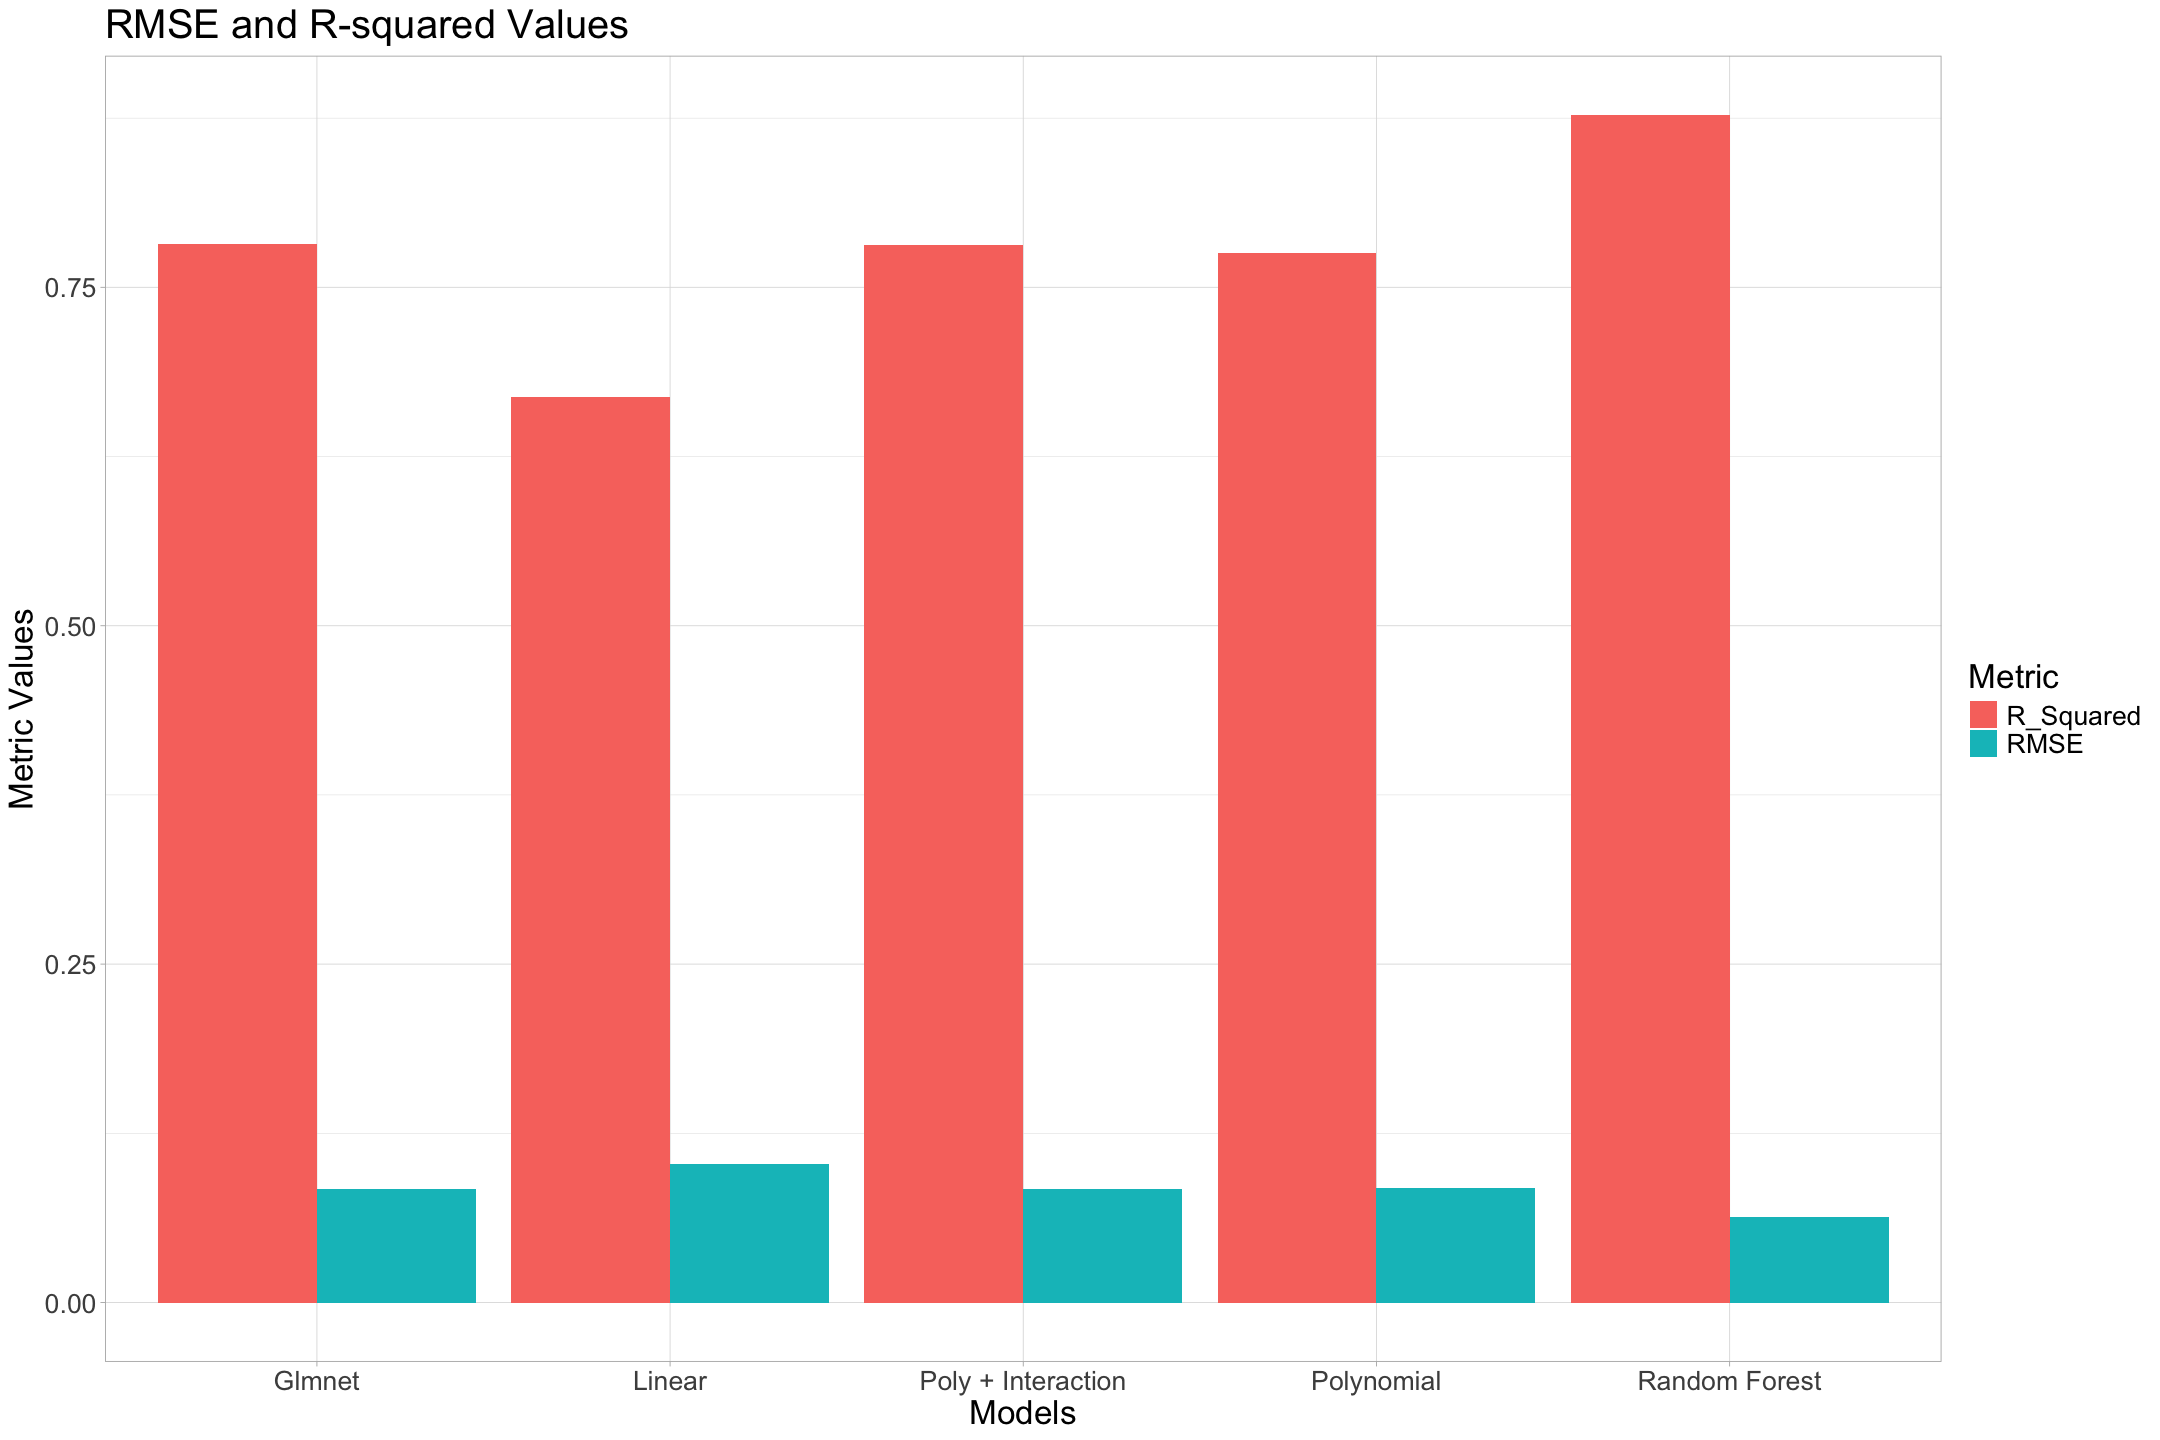

In [134]:
# Convert result data frame from wide to long format
model_results_long_format <- model_results %>%
  pivot_longer(cols = c(RMSE, R_Squared), names_to = "Metric", values_to = "Value")

# Create the grouped bar chart
ggplot(model_results_long_format, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "RMSE and R-squared Values",
       x = "Models",
       y = "Metric Values") +
  theme_light() +
    theme(
        text = element_text(size = 20)
    )

#### Plot a Q-Q plot for Best Performing Linear Model and Non-Linear Model

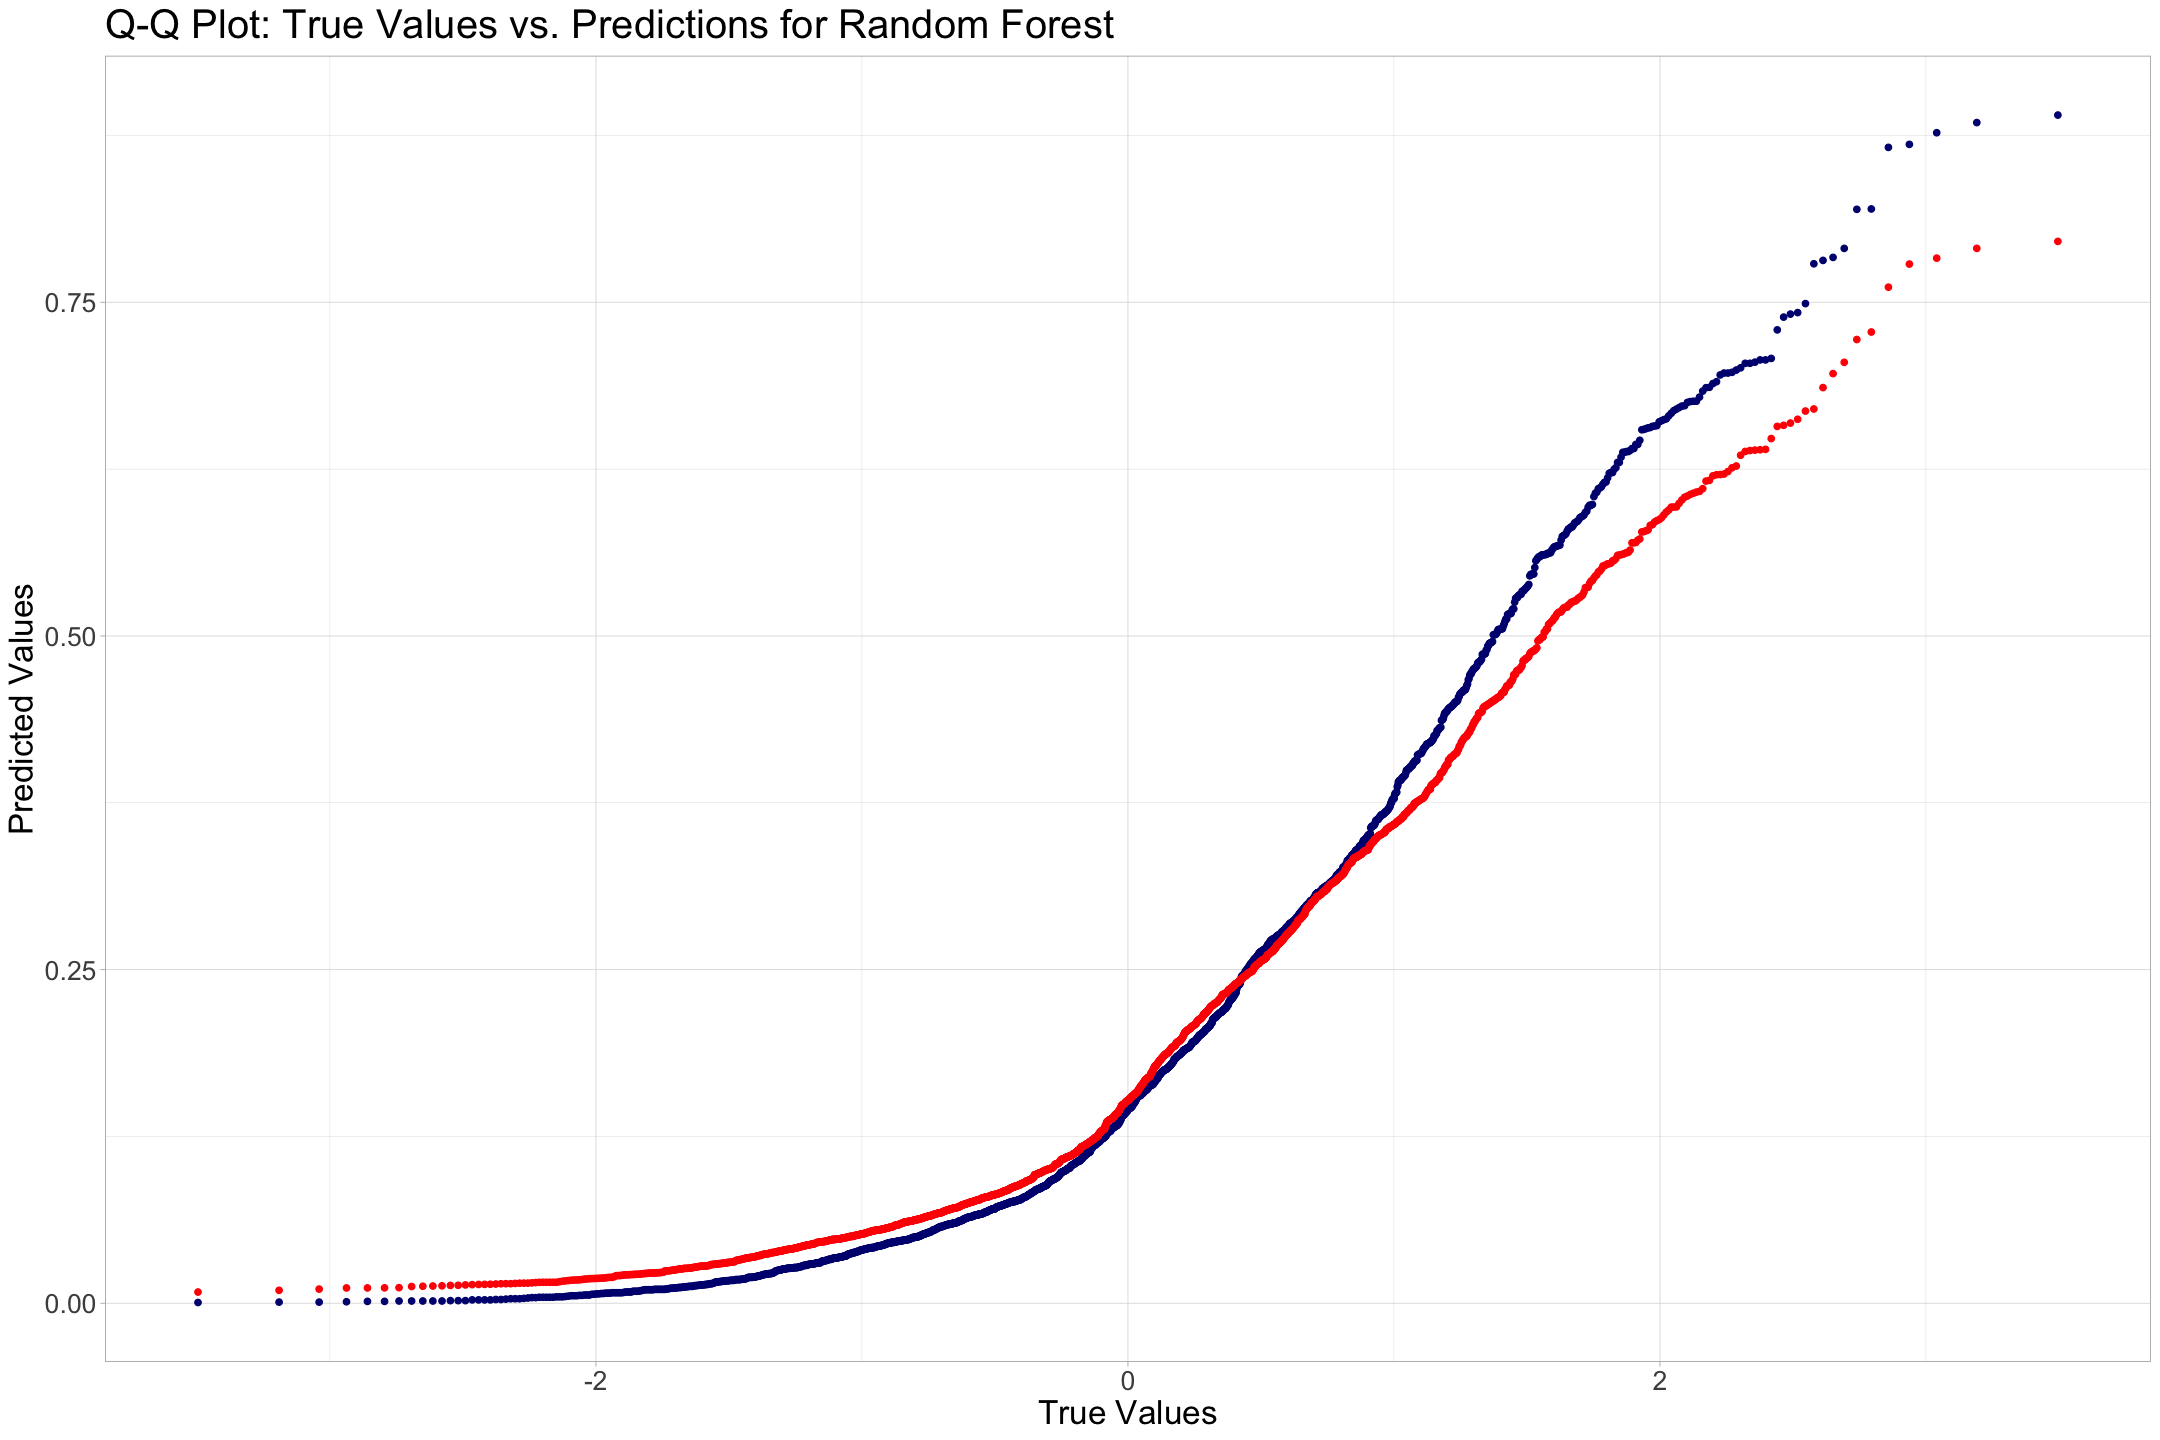

In [135]:
# Create the Q-Q plot for the XGB Model
ggplot(random_forest_test_df) +
    stat_qq(aes(sample = truth), color = 'navy') +
    stat_qq(aes(sample = predictions), color = 'red') +
    labs(title = "Q-Q Plot: True Values vs. Predictions for Random Forest",
         x = "True Values",
         y = "Predicted Values") +
    theme_light() +
    theme(
        text = element_text(size = 20)
    )

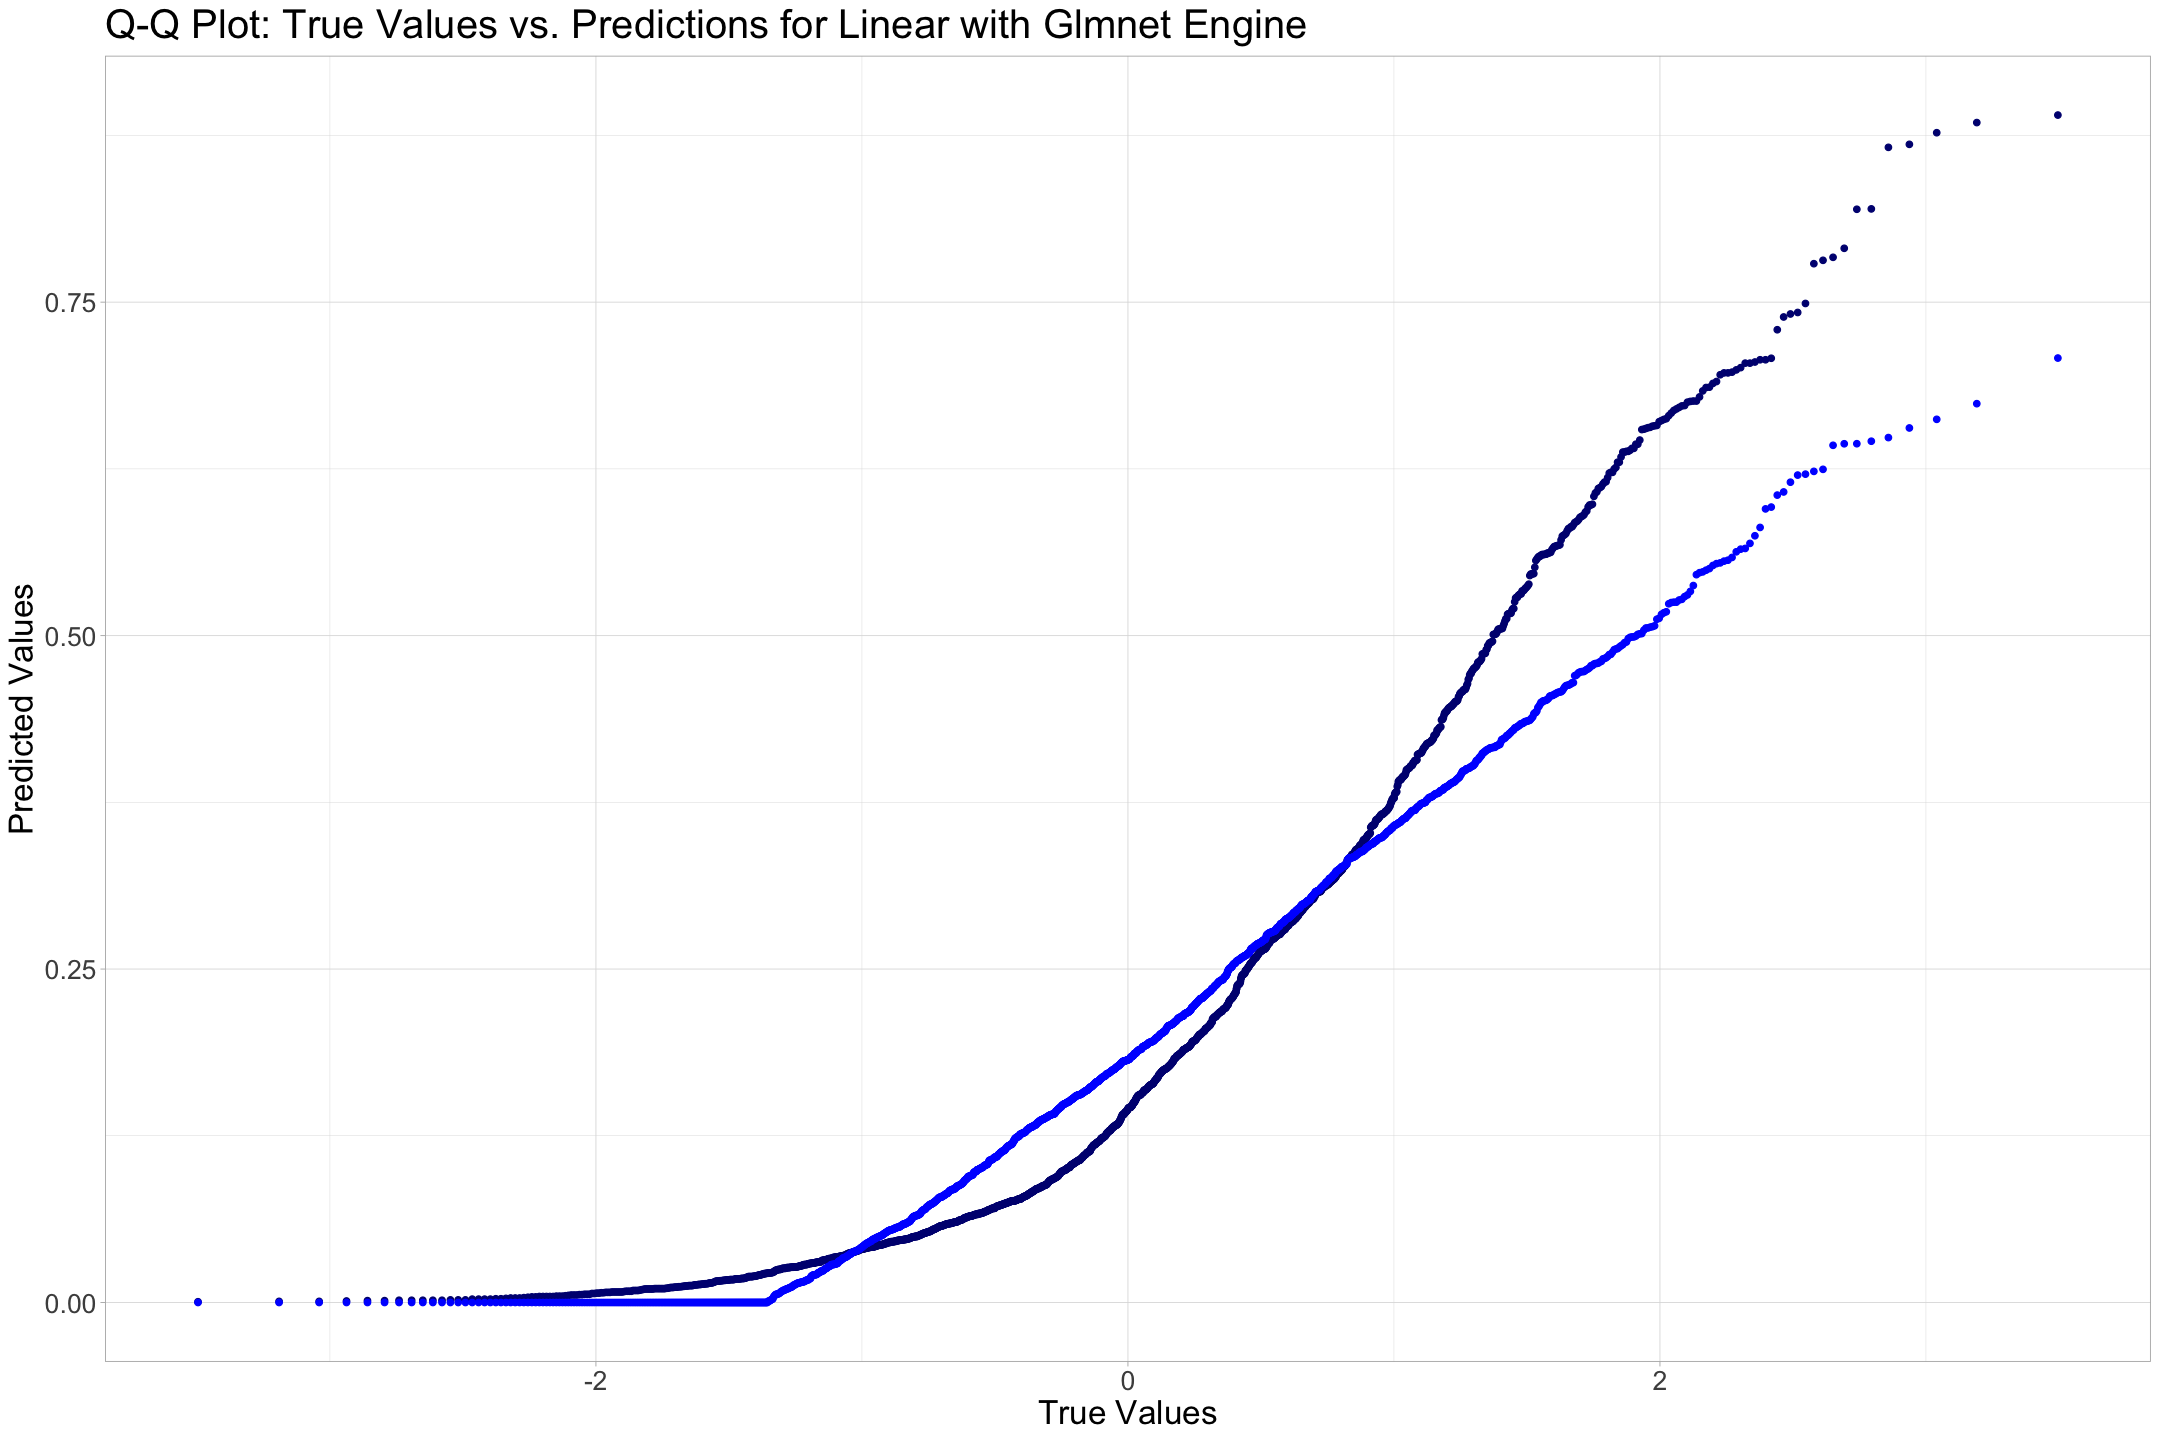

In [136]:
# Create the Q-Q plot for the Glmnet Model
ggplot(lm_glmnet_test) +
    stat_qq(aes(sample = truth), color = 'navy') +
    stat_qq(aes(sample = .pred), color = 'blue') +
    labs(title = "Q-Q Plot: True Values vs. Predictions for Linear with Glmnet Engine",
         x = "True Values",
         y = "Predicted Values") +
    theme_light() +
    theme(
        text = element_text(size = 20)
    )

#### Save Model for Deployment

In [162]:
# Save model to a file
saveRDS(lm_glmnet, file = "glmnet_model.rds") # Glmnet

saveRDS(random_forest, file = "random_forest_model.rds") # Random Forest

<h5 align="center">IBM Data Science with R - Capstone Project</h5>
<h4 align="center"> © IBM Corporation 2021. All rights reserved. </h4>